# Machine Learning Practices - Project (CS2008p)

## About the Project
- This is my Project for the course CS2008p (Machine Learning Practices Project) under the BS in Data Science and Applications degree.

- The problem statement shared with us is to predict the taxi fare based on the data provided.
    - Estimate the total amount paid by the passenger based on a set of features like trip distance, number of passangers, pick-up location, drop location, etc

- [Project Competition Link](https://www.kaggle.com/competitions/taxi-fare-guru-total-amount-prediction-challenge/)
## About Me

Info | Description
---|---
Name| Pushpak Ruhil
Roll no.| 21F2001180
Course Code | CS2008p
Email| 21f2001180@ds.study.iitm.ac.in

## Steps to any ML Project
There are a series of steps that are recommended to follow for any ML project:
1. Look at the bigger picture
1. Get the data
1. Discover and visualize the data to gain insights (Basically EDA)
1. Prepare data for the ML Algorithm
1. Select a model and train it
1. Fine-tune your model
1. Present the solution
1. Launch, monitor, and maintain the ML system

## Data Information

- This can be considered under the first step of ML project discussed, looking at the bigger picture

- To look at the bigger picture, we first need information on the problem statement and then on the data available to us. 
- The problem, discussed above, is a regression problem. So, we would be needed to apply a regression model to the data to get the desired output

- Evaluation is to be done based on the R2-SCORE metric
***
- Three files have been provided to us in the competition:

1. **train.csv**

- This contains the training data in the .csv format 
- Contains our target column as "total_amount"
- Features to be discussed during EDA

2. **test.csv**
- Test data on which evaluation is to be performed

3. **sample.csv**
- Sample submission




# Importing and Splitting the Data
- The second thing to do when starting with an ML project is to import the data and if necessary, split the features and target(s). 
- After which, it is also important to understand the features given to us

In [1]:
import numpy as np 
import pandas as pd 
import os

# For kaggle:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
try:
    df = pd.read_csv(os.path.join(dirname, "train.csv")) # Either in the kaggle directory
except NameError:
    df = pd.read_csv("train.csv") # or in the current directory
    
    

- The test data is yet to be loaded. 
- It will be loaded at the end, till then, we'll use a temporary test set (taken from the same training set) to evaluate our model performance at various steps

In [3]:
df.head(3)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-28 17:20:21   2023-06-28 16:34:45              1.0   
1         0  2023-06-29 23:05:01   2023-06-29 22:01:35              1.0   
2         1  2023-06-30 10:19:31   2023-06-30 11:13:10              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.14         1.0                  N           120             9   
1           2.70         1.0                  N            15           215   
2           1.15         1.0                  N           167           223   

  payment_type  extra  tip_amount  tolls_amount  improvement_surcharge  \
0  Credit Card    2.5    7.165589           0.0                    1.0   
1  Credit Card    3.5    6.067401           0.0                    1.0   
2  Credit Card    0.0    4.111547           0.0                    1.0   

   total_amount  congestion_surcharge  Airport_fee  
0         20.64                   2.5          0.0  
1         25.55                   2.5          0.0  
2         17.64                   2.5          0.0

In [4]:
# feature-target split

X = df.drop("total_amount", axis=1)
y = df["total_amount"]

In [5]:
X.head(3)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-28 17:20:21   2023-06-28 16:34:45              1.0   
1         0  2023-06-29 23:05:01   2023-06-29 22:01:35              1.0   
2         1  2023-06-30 10:19:31   2023-06-30 11:13:10              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.14         1.0                  N           120             9   
1           2.70         1.0                  N            15           215   
2           1.15         1.0                  N           167           223   

  payment_type  extra  tip_amount  tolls_amount  improvement_surcharge  \
0  Credit Card    2.5    7.165589           0.0                    1.0   
1  Credit Card    3.5    6.067401           0.0                    1.0   
2  Credit Card    0.0    4.111547           0.0                    1.0   

   congestion_surcharge  Airport_fee  
0                   2.5          0.0  
1                   2.5          0.0  
2                   2.5          0.0

In [6]:
y.head(3)

0    20.64
1    25.55
2    17.64
Name: total_amount, dtype: float64

In [7]:
# SPlitting train test set from the same "training set"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1002, test_size=0.25)

# Exploratory Data Analysis

- Let's start with some basic EDA on the training data

## Data Type Info

In [9]:
# Getting information on the datatype of each attribute
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131250 entries, 94366 to 90215
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               131250 non-null  int64  
 1   tpep_pickup_datetime   131250 non-null  object 
 2   tpep_dropoff_datetime  131250 non-null  object 
 3   passenger_count        126702 non-null  float64
 4   trip_distance          131250 non-null  float64
 5   RatecodeID             126702 non-null  float64
 6   store_and_fwd_flag     126702 non-null  object 
 7   PULocationID           131250 non-null  int64  
 8   DOLocationID           131250 non-null  int64  
 9   payment_type           131250 non-null  object 
 10  extra                  131250 non-null  float64
 11  tip_amount             131250 non-null  float64
 12  tolls_amount           131250 non-null  float64
 13  improvement_surcharge  131250 non-null  float64
 14  congestion_surcharge   126702 non

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131250 entries, 94366 to 90215
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               131250 non-null  int64  
 1   tpep_pickup_datetime   131250 non-null  object 
 2   tpep_dropoff_datetime  131250 non-null  object 
 3   passenger_count        126702 non-null  float64
 4   trip_distance          131250 non-null  float64
 5   RatecodeID             126702 non-null  float64
 6   store_and_fwd_flag     126702 non-null  object 
 7   PULocationID           131250 non-null  int64  
 8   DOLocationID           131250 non-null  int64  
 9   payment_type           131250 non-null  object 
 10  extra                  131250 non-null  float64
 11  tip_amount             131250 non-null  float64
 12  tolls_amount           131250 non-null  float64
 13  improvement_surcharge  131250 non-null  float64
 14  congestion_surcharge   126702 non

In [11]:
# Getting information on the shape of the dataset
X_train.shape

(131250, 16)

## Null Values

In [12]:
X_train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4548
trip_distance               0
RatecodeID               4548
store_and_fwd_flag       4548
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4548
Airport_fee              4548
dtype: int64

***
- There are a few null values
- About 28.8588391% values are null in the attributes, in the columns
- We need to check if all these information are missing in the same row or different rows
***

## Zero values in the dataset

In [13]:
((X_train == 0).mean())*100

VendorID                 27.202286
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           1.645714
trip_distance             1.516190
RatecodeID                0.000000
store_and_fwd_flag        0.000000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
extra                    29.289143
tip_amount                0.000000
tolls_amount             91.004952
improvement_surcharge     0.025905
congestion_surcharge      8.233143
Airport_fee              87.392000
dtype: float64

***
The following two features need to be taken care of:
- tolls_amount has 91% zero values
- airport_fee has 87% zero values

***

In [14]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import seaborn as sns
sns.set_theme(color_codes=True)

## Pair Plot (Outlier viz.)

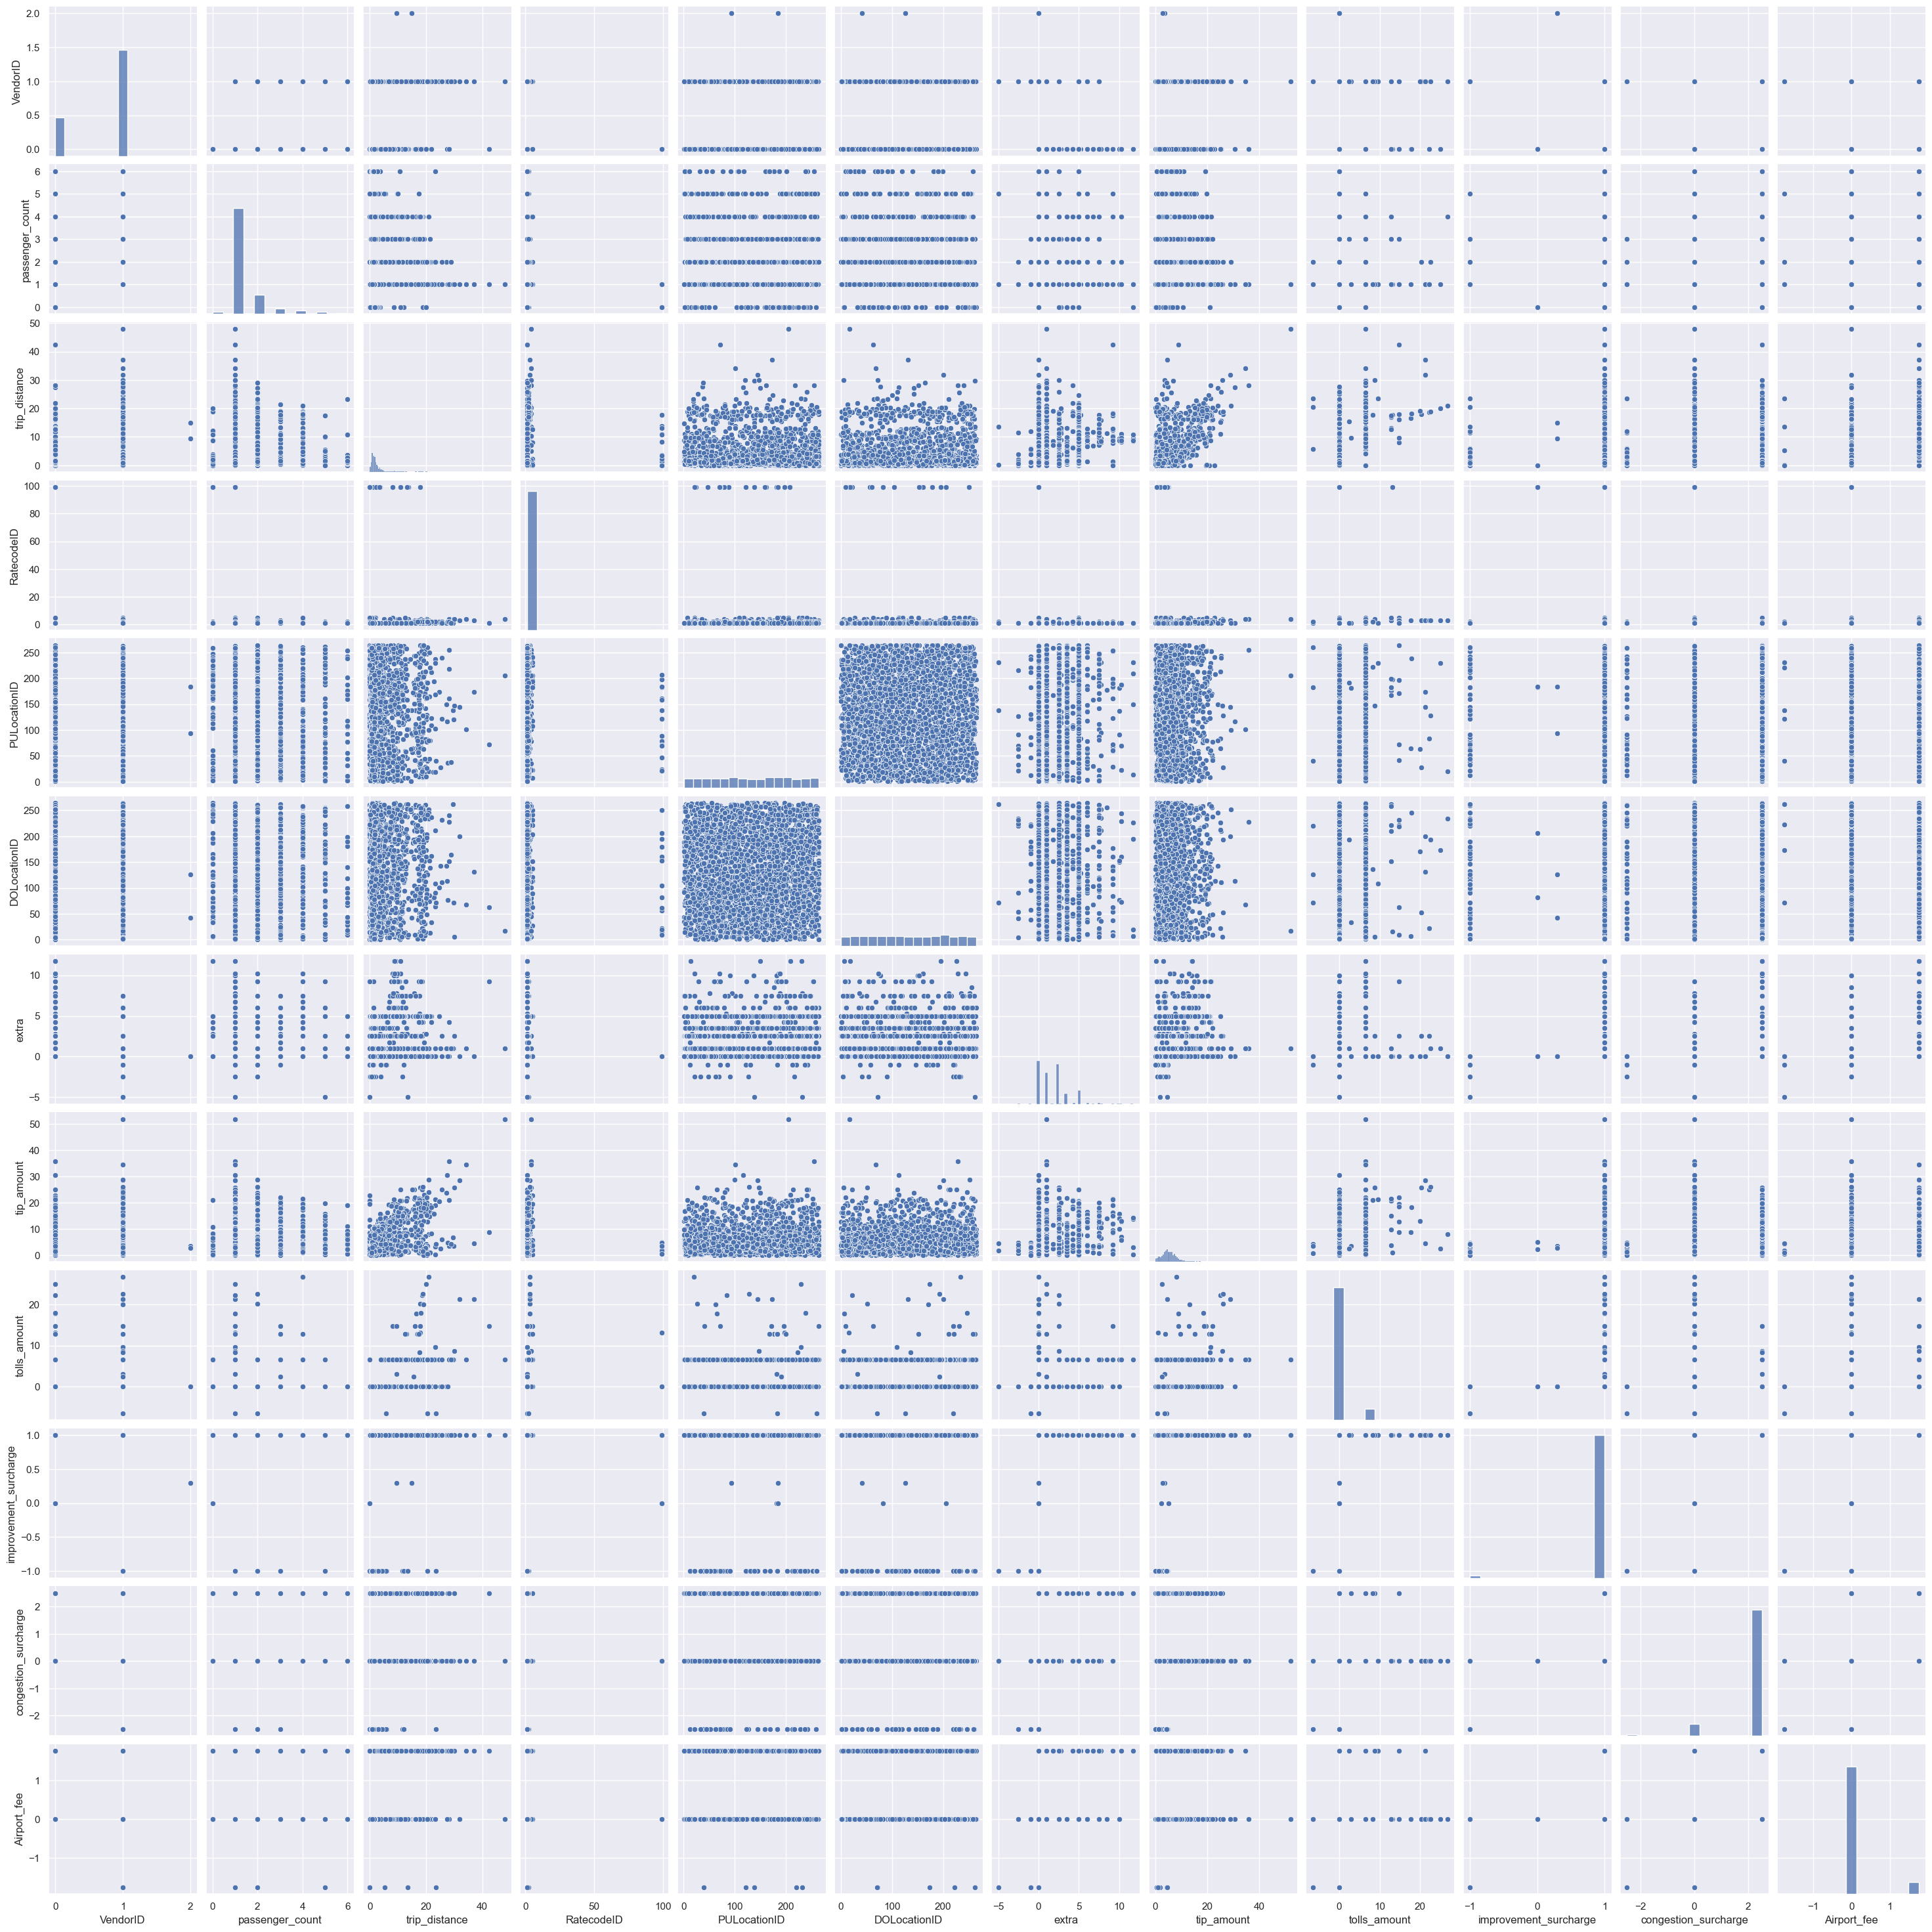

In [15]:
sns.pairplot(X_train.sample(3000))
plt.show()

***
- The above pairplot helps us identify that there are outliers in the trends as well as the trend and correlation between attributes
- So, we need to remove the outliers as well
***

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131250 entries, 94366 to 90215
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               131250 non-null  int64  
 1   tpep_pickup_datetime   131250 non-null  object 
 2   tpep_dropoff_datetime  131250 non-null  object 
 3   passenger_count        126702 non-null  float64
 4   trip_distance          131250 non-null  float64
 5   RatecodeID             126702 non-null  float64
 6   store_and_fwd_flag     126702 non-null  object 
 7   PULocationID           131250 non-null  int64  
 8   DOLocationID           131250 non-null  int64  
 9   payment_type           131250 non-null  object 
 10  extra                  131250 non-null  float64
 11  tip_amount             131250 non-null  float64
 12  tolls_amount           131250 non-null  float64
 13  improvement_surcharge  131250 non-null  float64
 14  congestion_surcharge   126702 non

## Five Point Summary + Boxen Plots

In [17]:
# Function to get 5 point summary for any given attributes

def five_point_summary(X_train, attribute_name):
    import seaborn as sns
    if attribute_name in X_train.columns:
        if (X_train[attribute_name].dtype == int) or (X_train[attribute_name].dtype == float):
            data_min = X_train[attribute_name].min()
            data_q1 = X_train[attribute_name].quantile(0.25)
            data_q2 = X_train[attribute_name].quantile(0.5)
            data_q3 = X_train[attribute_name].quantile(0.75)
            data_max = X_train[attribute_name].max()
            output= f"""
            *****************************************************
            \t\t\t***************
            \t\t\t5 Point Summary
            \t\t\t***************
            Attribute: {attribute_name}
            
            Minimum value: {data_min}
            First Quartile value: {data_q1}
            Second Quartile(Median) value: {data_q2}
            Third Quartile value: {data_q3}
            Maximum value: {data_max}
            *****************************************************
            \t\t\t**************
            \t\t\tBox/Boxen Plot
            \t\t\t**************
            """
            print(output)
            sns.boxenplot(x=attribute_name, data=X_train)
            return plt.show()
            
        else:
            return print("The given attribute is categorical. Cannot have 5 point summary.")
    else:
        return print("Attribute name doesn't exist in the given data")


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: VendorID
            
            Minimum value: 0
            First Quartile value: 0.0
            Second Quartile(Median) value: 1.0
            Third Quartile value: 1.0
            Maximum value: 2
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


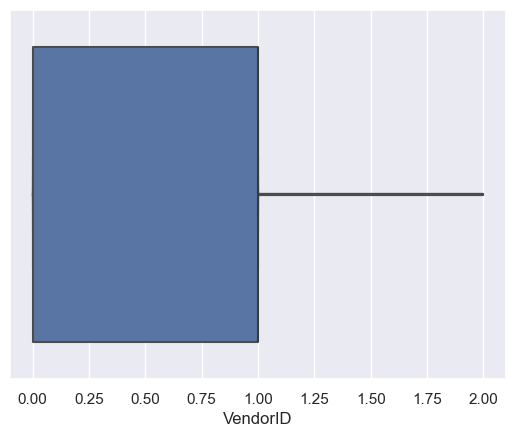

The given attribute is categorical. Cannot have 5 point summary.
The given attribute is categorical. Cannot have 5 point summary.

            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: passenger_count
            
            Minimum value: 0.0
            First Quartile value: 1.0
            Second Quartile(Median) value: 1.0
            Third Quartile value: 1.0
            Maximum value: 8.0
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


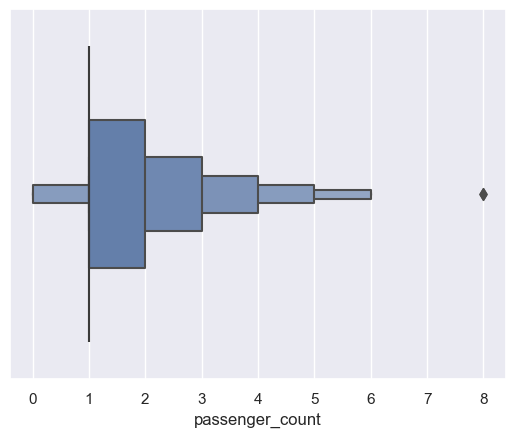


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: trip_distance
            
            Minimum value: 0.0
            First Quartile value: 1.08
            Second Quartile(Median) value: 1.84
            Third Quartile value: 3.63
            Maximum value: 135182.06
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


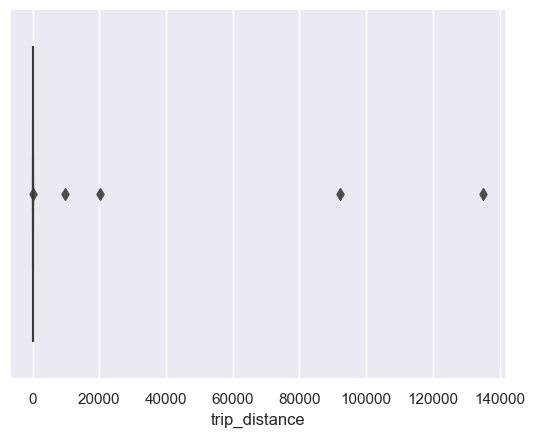


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: RatecodeID
            
            Minimum value: 1.0
            First Quartile value: 1.0
            Second Quartile(Median) value: 1.0
            Third Quartile value: 1.0
            Maximum value: 99.0
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


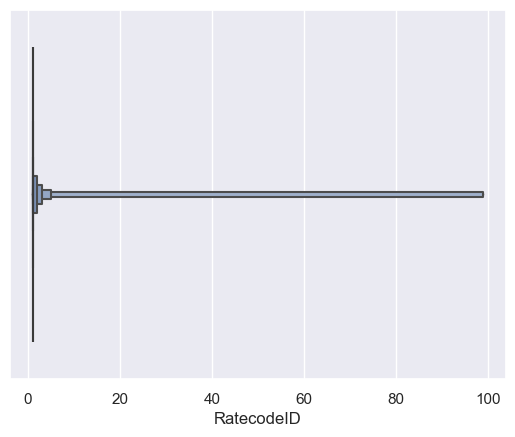

The given attribute is categorical. Cannot have 5 point summary.

            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: PULocationID
            
            Minimum value: 1
            First Quartile value: 67.0
            Second Quartile(Median) value: 133.0
            Third Quartile value: 199.0
            Maximum value: 264
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


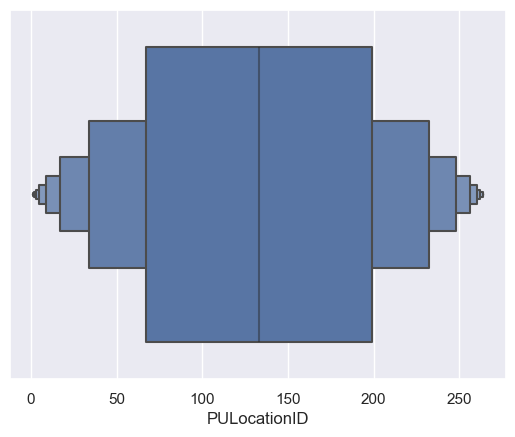


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: DOLocationID
            
            Minimum value: 1
            First Quartile value: 67.0
            Second Quartile(Median) value: 133.0
            Third Quartile value: 199.0
            Maximum value: 264
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


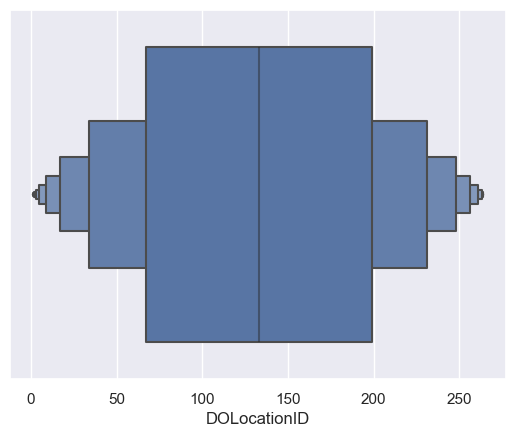

The given attribute is categorical. Cannot have 5 point summary.

            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: extra
            
            Minimum value: -7.5
            First Quartile value: 0.0
            Second Quartile(Median) value: 1.0
            Third Quartile value: 2.5
            Maximum value: 11.75
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


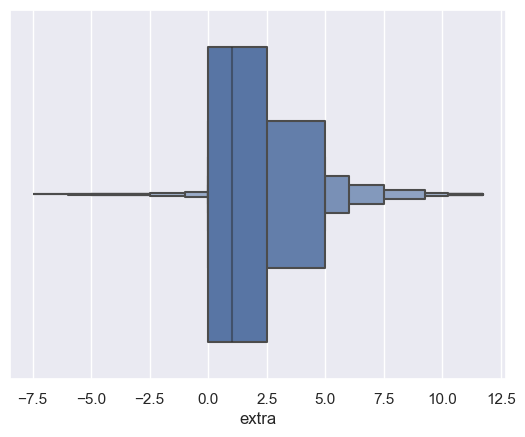


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: tip_amount
            
            Minimum value: 0.0001293959738579
            First Quartile value: 3.476109569363344
            Second Quartile(Median) value: 5.297944766437441
            Third Quartile value: 7.5146978080148
            Maximum value: 484.876150598094
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


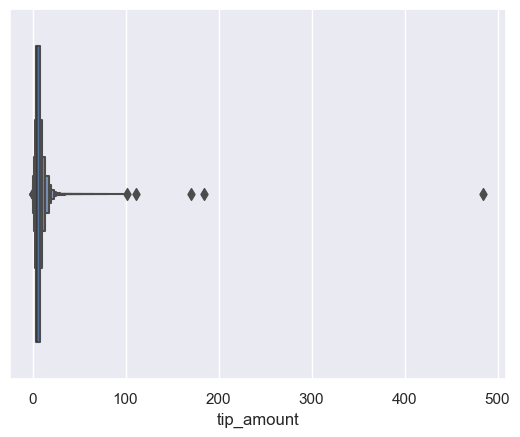


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: tolls_amount
            
            Minimum value: -29.3
            First Quartile value: 0.0
            Second Quartile(Median) value: 0.0
            Third Quartile value: 0.0
            Maximum value: 80.0
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


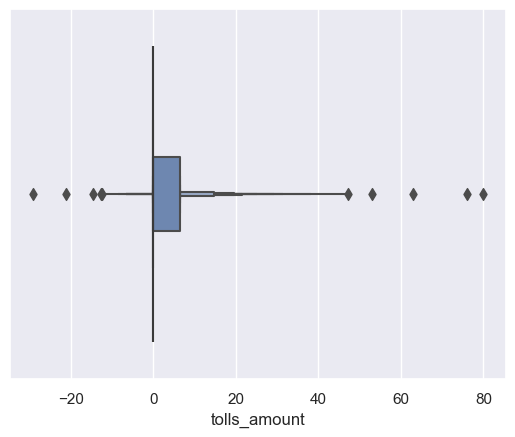


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: improvement_surcharge
            
            Minimum value: -1.0
            First Quartile value: 1.0
            Second Quartile(Median) value: 1.0
            Third Quartile value: 1.0
            Maximum value: 1.0
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


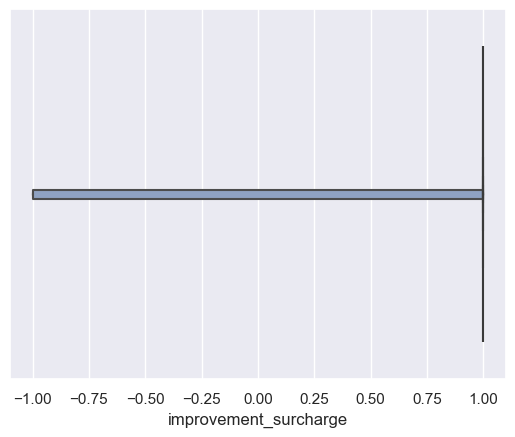


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: congestion_surcharge
            
            Minimum value: -2.5
            First Quartile value: 2.5
            Second Quartile(Median) value: 2.5
            Third Quartile value: 2.5
            Maximum value: 2.5
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


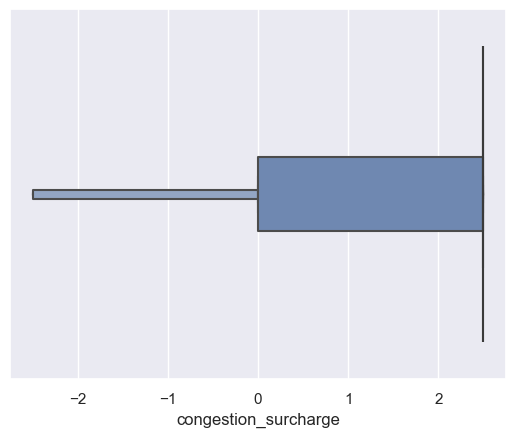


            *****************************************************
            			***************
            			5 Point Summary
            			***************
            Attribute: Airport_fee
            
            Minimum value: -1.75
            First Quartile value: 0.0
            Second Quartile(Median) value: 0.0
            Third Quartile value: 0.0
            Maximum value: 1.75
            *****************************************************
            			**************
            			Box/Boxen Plot
            			**************
            


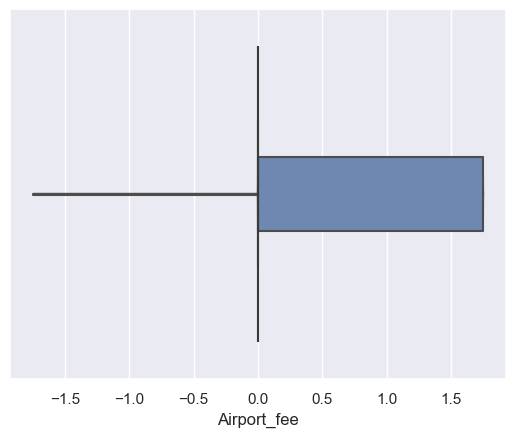

In [18]:
for attribute_name in X_train.columns:
    five_point_summary(X_train, attribute_name)

***
- It can be seen that few attributes have outliers in them
- They need to be removed as well
***

## Histograms to check Skewness

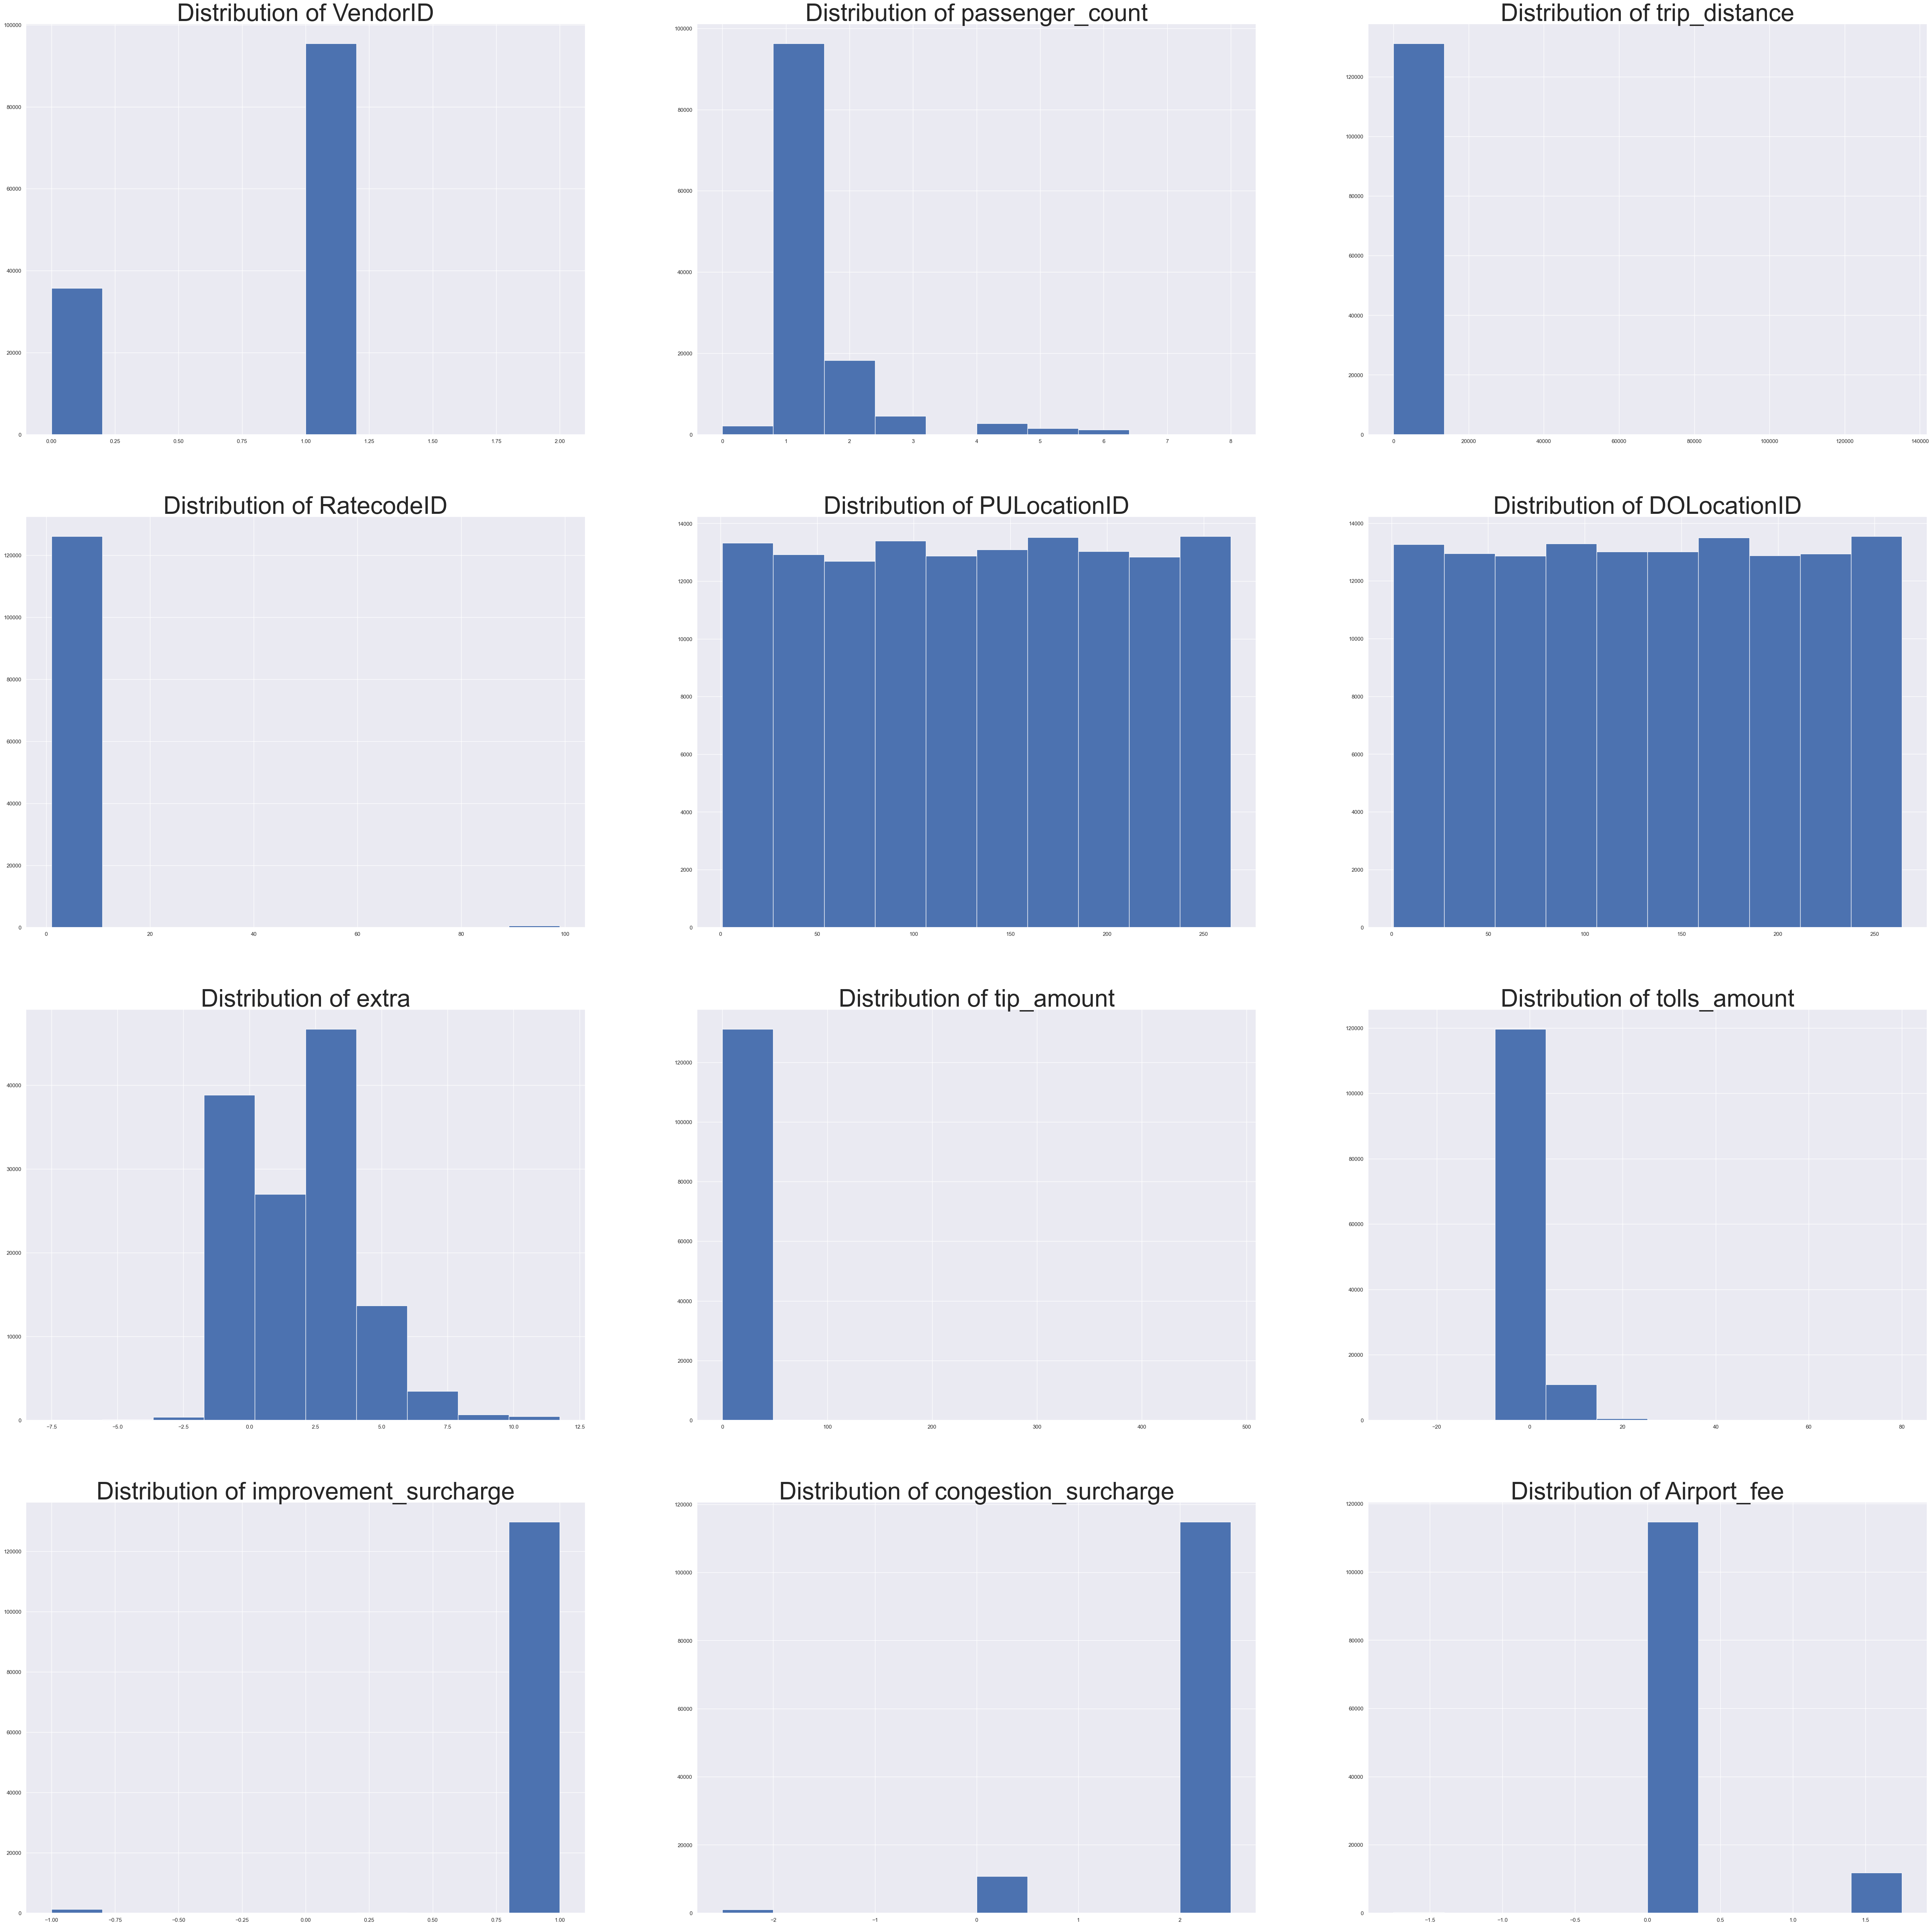

In [19]:
# PLotting histogram to check the distribution and skewness

fig, ax = plt.subplots(4,3, figsize=(70,70))

rind = 0
cind = 0
for attribute in X_train.columns:
    if (X_train[attribute].dtype == int) or (X_train[attribute].dtype == float):
        ax[rind, cind].hist(X_train[attribute])
        ax[rind, cind].set_title(f"Distribution of {attribute}", fontsize=50)
        cind +=1
    if cind ==3:
        rind += 1
        cind = 0


plt.show()

***
- It can be seen that a lot of attributes are imbalanced
- We need to check if that'll cause any problems in the training of the model
    - If it does, they need to be taken care of
***

In [20]:
corr_matrix = X_train.corr(numeric_only=True)

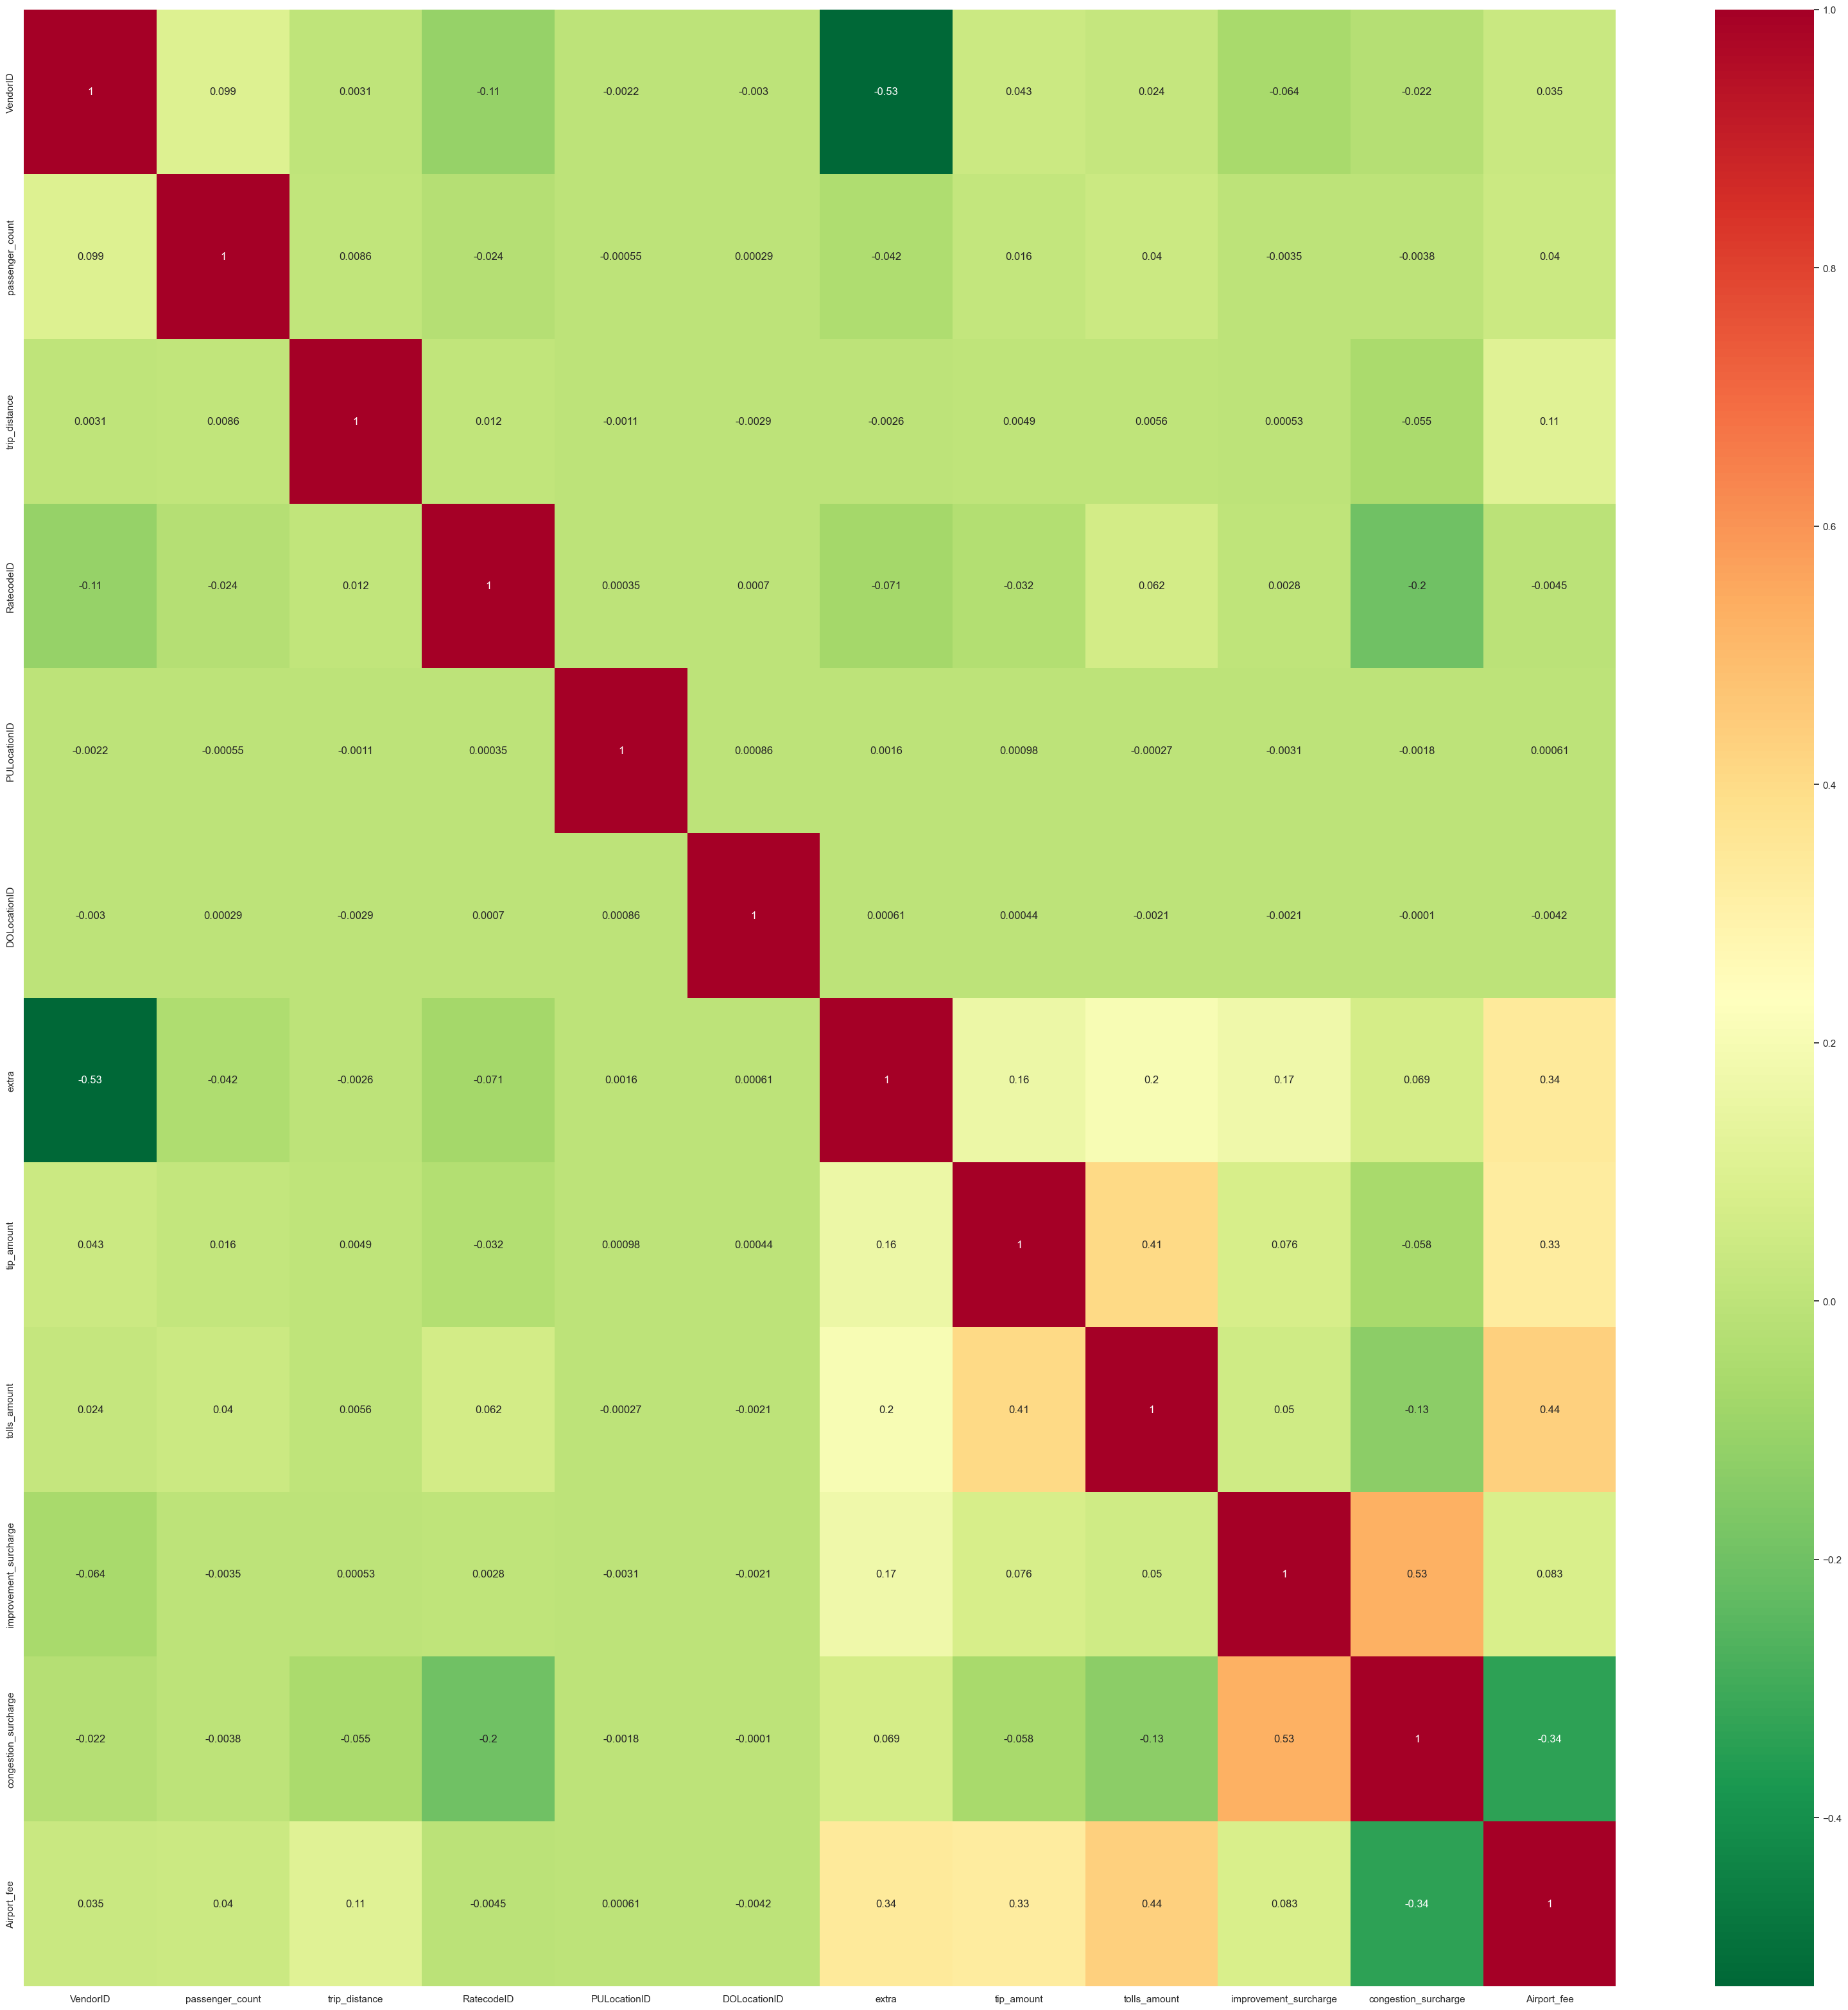

In [21]:
plt.rcParams["figure.figsize"] = (40,40)
sns.heatmap(corr_matrix, cmap='RdYlGn_r', annot=True)

plt.show()

***
- With the heatmap, there are some attributes where the linear correlation is considerably high
- For instance, between improvement_surcharge and congestion_supercharge
- Feature extraction needs to be performed in such cases if they cause any issues during the model training

***

# Data Clearning


The order followed for data cleaning and pre-processing is as follows:
- numerical vs cat attributes split
- impute null in num attrib based on median
- impute null in cat attrib based on most frequent
- Identify outliers
- OHE for cat attrib
- feature scaling for num attrib
- date time feature extraction and pre-processing
- outlier impute


In [13]:
# Zero values
((X_train == 0).mean())*100

VendorID                 27.202286
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           1.645714
trip_distance             1.516190
RatecodeID                0.000000
store_and_fwd_flag        0.000000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
extra                    29.289143
tip_amount                0.000000
tolls_amount             91.004952
improvement_surcharge     0.025905
congestion_surcharge      8.233143
Airport_fee              87.392000
dtype: float64

## Dropping zero value columns

In [14]:
# Dropping [tolls_amount, airport_fee] because 91% and 87.4% zero values respectively
X_train.drop(['tolls_amount', 'Airport_fee'], axis=1) # Not doing inplace because 
                                                      # we'll do this step later all 
                                                      # together with other pre-processing steps


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
94366          0  2023-06-29 18:18:35   2023-06-29 19:27:45              1.0   
11777          0  2023-06-30 12:18:42   2023-06-30 12:33:14              1.0   
33330          1  2023-06-29 10:30:27   2023-06-29 10:42:52              0.0   
158253         1  2023-06-28 18:10:27   2023-06-28 17:23:27              1.0   
114020         1  2023-06-29 07:53:01   2023-06-29 08:46:26              1.0   
...          ...                  ...                   ...              ...   
8852           0  2023-06-29 13:57:29   2023-06-29 13:27:25              1.0   
69752          1  2023-06-29 09:05:51   2023-06-29 09:30:17              2.0   
152827         1  2023-06-30 15:40:44   2023-06-30 15:06:36              1.0   
80321          0  2023-06-28 18:22:08   2023-06-28 19:48:18              0.0   
90215          1  2023-06-29 17:24:18   2023-06-29 19:16:29              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
94366            1.30         1.0                  N            33   
11777           10.80         1.0                  N            73   
33330            0.00         5.0                  N           238   
158253           3.65         1.0                  N             3   
114020           3.43         1.0                  N           141   
...               ...         ...                ...           ...   
8852             0.30         1.0                  N           176   
69752            6.81         1.0                  N            68   
152827           1.37         1.0                  N           186   
80321            9.30         1.0                  N           164   
90215            1.76         NaN                NaN           218   

        DOLocationID payment_type  extra  tip_amount  improvement_surcharge  \
94366            137  Credit Card   5.00    4.776780                    1.0   
11777            114  Credit Card   7.50    8.476391                    1.0   
33330             45  Credit Card   0.00    1.192649                    1.0   
158253            89  Credit Card   2.50    8.272961                    1.0   
114020           233  Credit Card   0.00    7.102520                    1.0   
...              ...          ...    ...         ...                    ...   
8852             167         Cash   2.50    3.780324                    1.0   
69752             11  Credit Card   0.00    0.695260                    1.0   
152827           198  Credit Card   0.00    3.963555                    1.0   
80321            118  Credit Card  11.75   13.466104                    1.0   
90215            202       Wallet   0.00    4.901728                    1.0   

        congestion_surcharge  
94366                    2.5  
11777                    2.5  
33330                    0.0  
158253                   2.5  
114020                   2.5  
...                      ...  
8852                     2.5  
69752                    2.5  
152827                   2.5  
80321                    2.5  
90215                    NaN  

[131250 rows x 14 columns]

In [15]:
# No value in the entire dataset equal to -93545
X[X == -93545].count()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [8]:
# Outlier imputation - custom transformer

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Extending the BaseEstimator to create a custom transformer
class OutliersIdentifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Importing required APIs in the custom transformer
        from sklearn.impute import SimpleImputer
        from sklearn.compose import ColumnTransformer
        
        pass

    
    # The fit method in the custom class
    def fit(self, X, y=None):
                
        # Storing the original column order    
        self.original_columns = X.columns.tolist()

        
        # NUMERICAL ATTRIBUTES
        self.num_columns = ['passenger_count', 
                            'trip_distance', 'extra', 
                            'tip_amount',
                            'improvement_surcharge', 
                            'congestion_surcharge'
                           ]
        
        #calculating the quartiles 
        self.data_q1 = X.quantile(0.25, numeric_only=True)
        self.data_q3 = X.quantile(0.75, numeric_only=True)
        
        # IQR
        self.data_iqr = self.data_q3 - self.data_q1
        
        return self
    

    # def transform(self, X, y=None):
    #     X_outlier_replaced = self.data.replace(self.data < (1.5*self.data_iqr - self.data_q1), "out_liar")

    def transform(self, X, y=None):
        X_outlier_replaced = X.copy()

        # Replace outliers with "-93545"
        # For loop to iterate over the columns and replace the ooutliers with the defined value
        for col in self.num_columns:
            lower_bound = self.data_q1[col] - 1.5 * self.data_iqr[col]
            upper_bound = self.data_q3[col] + 1.5 * self.data_iqr[col]
            
            # Replacing the data in the copied dataset
            X_outlier_replaced[col] = X_outlier_replaced[col].where(
                (X_outlier_replaced[col] >= lower_bound) & (X_outlier_replaced[col] <= upper_bound),
                -93545
            )

        return X_outlier_replaced
#         # Impute outliers with the mean strategy
#         data_imputer = SimpleImputer(strategy='mean', missing_values=np.nan) 
        
#         # Column Transformer to apply the imputer only to the numerical attributes
#         col_trans = ColumnTransformer([
#             ('imputer', data_imputer, self.num_columns)
#         ], remainder='passthrough')
        
#         X_imputed = col_trans.fit_transform(X_outlier_replaced)

#         return X_imputed


In [9]:
# Creating an instance of the customer outlier imputer
oi = OutliersIdentifier()

# testing the outlier imputer
temp = oi.fit_transform(X_train)

In [10]:
X_train.quantile(0.25, numeric_only=True)

VendorID                  0.00000
passenger_count           1.00000
trip_distance             1.08000
RatecodeID                1.00000
PULocationID             67.00000
DOLocationID             67.00000
extra                     0.00000
tip_amount                3.47611
tolls_amount              0.00000
improvement_surcharge     1.00000
congestion_surcharge      2.50000
Airport_fee               0.00000
Name: 0.25, dtype: float64

In [11]:
print(f"More than upper bound: {(X_train['extra'][X_train['extra'] > 6.25]).count()}")
print(f"Less than upper bound: {X_train['extra'][X_train['extra'] <= 6.25].count()}")

More than upper bound: 3242
Less than upper bound: 128008


In [9]:
(3242/128008)*100

2.5326542091119304

In [10]:
temp.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
94366         0  2023-06-29 18:18:35   2023-06-29 19:27:45              1.0   
11777         0  2023-06-30 12:18:42   2023-06-30 12:33:14              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
94366            1.3         1.0                  N            33   
11777       -93545.0         1.0                  N            73   

       DOLocationID payment_type    extra  tip_amount  tolls_amount  \
94366           137  Credit Card      5.0    4.776780          0.00   
11777           114  Credit Card -93545.0    8.476391          6.55   

       improvement_surcharge  congestion_surcharge  Airport_fee  
94366                    1.0                   2.5          0.0  
11777                    1.0                   2.5          0.0

In [11]:
X_train.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
94366         0  2023-06-29 18:18:35   2023-06-29 19:27:45              1.0   
11777         0  2023-06-30 12:18:42   2023-06-30 12:33:14              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
94366            1.3         1.0                  N            33   
11777           10.8         1.0                  N            73   

       DOLocationID payment_type  extra  tip_amount  tolls_amount  \
94366           137  Credit Card    5.0    4.776780          0.00   
11777           114  Credit Card    7.5    8.476391          6.55   

       improvement_surcharge  congestion_surcharge  Airport_fee  
94366                    1.0                   2.5          0.0  
11777                    1.0                   2.5          0.0

In [12]:
temp[temp==-93545].count()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          34944
trip_distance            18154
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
extra                     3328
tip_amount                8391
tolls_amount                 0
improvement_surcharge     1412
congestion_surcharge     16407
Airport_fee                  0
dtype: int64

In [15]:
X_train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4548
trip_distance               0
RatecodeID               4548
store_and_fwd_flag       4548
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4548
Airport_fee              4548
dtype: int64

In [16]:
X_train.RatecodeID.unique()

array([ 1.,  5.,  4.,  2., nan,  3., 99.])

- Need to remove "99" as it's an outlier

In [17]:
X_train.select_dtypes(include='number').columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [18]:
X_train.select_dtypes(include='object').columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')

In [12]:
# numerical attributes: They will be used for imputing
# This doesn't include any of the ID attributes (They will be dealt with later on)
num_attribs = ['passenger_count', 'trip_distance', 
                        'extra', 'tip_amount', 
                        'improvement_surcharge', 
                        'congestion_surcharge']


# Categorical attributes: For categorical encoding
cat_attribs = ['store_and_fwd_flag',
               'payment_type']

# Date time attributes
time_attribs = ['tpep_pickup_datetime', 
               'tpep_dropoff_datetime']
# All other remaining attributes
other_attribs = X.columns.difference(num_attribs+cat_attribs+time_attribs)

In [14]:
other_attribs

Index(['Airport_fee', 'DOLocationID', 'PULocationID', 'RatecodeID', 'VendorID',
       'tolls_amount'],
      dtype='object')

In [21]:
X_train[cat_attribs].isnull().sum()

store_and_fwd_flag    4548
payment_type             0
dtype: int64

## Pre-Processing

In [13]:
# Custom transformer which does the following:
# Converts date time attributes tothe respective format
# Finds the difference and then removes the original columns
class DateTimeCustomTrans(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    # Fit function defined
    def fit(self, X, y=None):
        return self
    
    # Transformer code logic
    def transform(self, X, y=None):
        X_trans = pd.DataFrame(X.copy())
        

        # Date time attributes
        self.attribs = ['tpep_pickup_datetime', 
               'tpep_dropoff_datetime']

        # Converting to datetime
        for attrib in self.attribs:
            X_trans[attrib] = pd.to_datetime(X_trans[attrib])

        # Time difference
        time_diff = (X_trans[self.attribs[1]] - X_trans[self.attribs[0]])
        
        # depricated col name: X.shape[1]
        X_trans['time_difference_min'] = time_diff.apply(lambda x: x.seconds//60)
        X_trans.drop(self.attribs[0], axis=1, inplace=True)
        X_trans.drop(self.attribs[1], axis=1, inplace=True)
        
        
        
        return X_trans
        
        

In [16]:
np.array(X_train)

array([[0, '2023-06-29 18:18:35', '2023-06-29 19:27:45', ..., 1.0, 2.5,
        0.0],
       [0, '2023-06-30 12:18:42', '2023-06-30 12:33:14', ..., 1.0, 2.5,
        0.0],
       [1, '2023-06-29 10:30:27', '2023-06-29 10:42:52', ..., 1.0, 0.0,
        0.0],
       ...,
       [1, '2023-06-30 15:40:44', '2023-06-30 15:06:36', ..., 1.0, 2.5,
        0.0],
       [0, '2023-06-28 18:22:08', '2023-06-28 19:48:18', ..., 1.0, 2.5,
        1.75],
       [1, '2023-06-29 17:24:18', '2023-06-29 19:16:29', ..., 1.0, nan,
        nan]], dtype=object)

In [17]:
# dt = DateTimeCustomTrans()

# testing the transformer
# dt.fit_transform(X_train).head(3)

In [18]:
X_train.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
94366         0  2023-06-29 18:18:35   2023-06-29 19:27:45              1.0   
11777         0  2023-06-30 12:18:42   2023-06-30 12:33:14              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
94366            1.3         1.0                  N            33   
11777           10.8         1.0                  N            73   

       DOLocationID payment_type  extra  tip_amount  tolls_amount  \
94366           137  Credit Card    5.0    4.776780          0.00   
11777           114  Credit Card    7.5    8.476391          6.55   

       improvement_surcharge  congestion_surcharge  Airport_fee  
94366                    1.0                   2.5          0.0  
11777                    1.0                   2.5          0.0

In [14]:
# Creating a column transformer for all the data cleaning
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# numerical attributes: They will be used for imputing
# This doesn't include any of the ID attributes (They will be dealt with later on)
num_attribs = ['passenger_count', 'trip_distance', 
                        'extra', 'tip_amount', 
                        'improvement_surcharge', 
                        'congestion_surcharge']


# Categorical attributes: For categorical encoding
cat_attribs = ['store_and_fwd_flag',
               'payment_type']

# Date time attributes
time_attribs = ['tpep_pickup_datetime', 
               'tpep_dropoff_datetime']

# All other remaining attributes
other_attribs = X.columns.difference(num_attribs+cat_attribs+time_attribs)


# Imputes the numerical and categorical attributes
# Also identify the outliers in each numerical attribute
impute_col_trans = ColumnTransformer([
    ('num_impute', SimpleImputer(strategy='median'), num_attribs),
    ('cat_impute', SimpleImputer(strategy='most_frequent'), cat_attribs),
    ('outlier_identify', OutliersIdentifier(), num_attribs), # Identifying and marking the outliers
], remainder='passthrough')




# The output after the first set of imputation is an array
# We need to specify integer columns now, instead of string names
# These columns indices were defined after executing the above imputations
# Now, mostly, we have standardization of attributes
# So, numerical and others attributes will be counted as the same
# Other attributes were mostly ID columns
num_attribs = [0,1,2,3,4,5,8,9,10,11,12,13,14,17,19]
cat_attribs = [6,7]
time_attribs = [22,23]


# standardizing the attributes and OHE
intermediate_col_trans = ColumnTransformer([
    ('cat_ohe', OneHotEncoder(), cat_attribs), # One hot encoding on categorical attributes
    ('num_scale', StandardScaler(), num_attribs), # standard scaler on numerical attributes
    # ('datetime_featureEngineering', DateTimeCustomTrans(), time_attribs), # time difference using custom transf
    
], remainder='passthrough')


# Imputing the outliers
final_col_trans = ColumnTransformer([
    ('outlier_impute', SimpleImputer(strategy='mean', 
                                     missing_values=-93545), 
     num_attribs), # Imputing outliers
], remainder='passthrough')


# Full pipeline - yet incomplete
full_pipe = Pipeline([
    ('impute_CT', impute_col_trans),
    ('impute_others_CT',SimpleImputer(strategy='most_frequent')), # One attribute from others need to be imputed (its a type of ID)
    ('intermediate_CT', intermediate_col_trans),
    ('date_time', DateTimeCustomTrans()),
    ('final_CT', final_col_trans)
])


# Final pipeline to be used
final_pipe = Pipeline([
    ('full_pipe', full_pipe),
    ('final_standardize', ColumnTransformer([ # This step is to scale the last column which was added "time difference in minutes"
        ('final_scaler', StandardScaler(), [-1])
    ], remainder='passthrough'))
])


In [15]:
# Creating a column transformer for all the data cleaning
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# numerical attributes: They will be used for imputing
# This doesn't include any of the ID attributes (They will be dealt with later on)
num_attribs = ['passenger_count', 'trip_distance', 
                        'extra', 'tip_amount', 
                        'improvement_surcharge', 
                        'congestion_surcharge', 'time_difference_min']


# Categorical attributes: For categorical encoding
cat_attribs = ['store_and_fwd_flag',
               'payment_type']

# Date time attributes
time_attribs = ['tpep_pickup_datetime', 
               'tpep_dropoff_datetime']

# All other remaining attributes
other_attribs = X.columns.difference(num_attribs+cat_attribs+time_attribs)


# Imputes the numerical and categorical attributes
# Also identify the outliers in each numerical attribute
impute_col_trans = ColumnTransformer([
    ('num_impute', SimpleImputer(strategy='median'), num_attribs),
    ('cat_impute', SimpleImputer(strategy='most_frequent'), cat_attribs),
    ('outlier_identify', OutliersIdentifier(), num_attribs), # Identifying and marking the outliers
], remainder='passthrough')




# The output after the first set of imputation is an array
# We need to specify integer columns now, instead of string names
# These columns indices were defined after executing the above imputations
# Now, mostly, we have standardization of attributes
# So, numerical and others attributes will be counted as the same
# Other attributes were mostly ID columns
num_attribs = [0,1,2,3,4,5,6,9,10,11,12,13,14]
cat_attribs = [7, 8]
# time_attribs = [9,10]


# Datetime feature extraction, imputation, and standardizing the attributes and OHE
pipe_main = Pipeline([
    ('datetime_featureEngineering', DateTimeCustomTrans()), # time difference using custom transf
    ('impute', impute_col_trans),
    ('col', ColumnTransformer([
        ('cat_ohe', OneHotEncoder(), cat_attribs), # One hot encoding on categorical attributes
        ('num_scale', StandardScaler(), num_attribs), # standard scaler on numerical attributes
        ], remainder='passthrough')
    ),
    ('impute2', SimpleImputer(strategy='median')),
])


# Imputing the outliers
final_outlier_pipe = ColumnTransformer([
    ('outlier_impute', SimpleImputer(strategy='mean', 
                                     missing_values=-93545),
     num_attribs), # Imputing outliers
], remainder='passthrough')


# # Full pipeline - yet incomplete
# full_pipe = Pipeline([
#     ('impute_CT', impute_col_trans),
#     ('intermediate_CT', intermediate_col_trans),
#     ('date_time', DateTimeCustomTrans()),
#     # ('final_CT', final_col_trans)
# ])


# Final pipeline to be used
final_pipe = Pipeline([
    ('full_pipe', pipe_main),
    ('outlier_impute', final_outlier_pipe),
    ('final_scaling', StandardScaler())
])


In [16]:
X_train.groupby('RatecodeID').count()['VendorID']

RatecodeID
1.0     118931
2.0       5517
3.0        553
4.0        338
5.0        805
99.0       558
Name: VendorID, dtype: int64

## Final pre-processing

- Dropping ```[tolls_amount, airport_fee]``` because 91% and 87.4% zero values respectively
- Remove rows where ```RatecodeID == 99``` (rating code should be between 1 and 5)
- Apply final pipeline to the dataset after the above 2 pre-processing

In [112]:
# SPlitting train test set from the same "training set"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1002, test_size=0.25)

### X_train transformed

In [113]:
X_train.drop(['tolls_amount', 'Airport_fee'], axis=1, inplace=True)

In [114]:
# deleted_indices = X_train['RatecodeID'].index[(X_train['RatecodeID'] == 99)]

In [115]:
# y_train = y_train[X_train['RatecodeID'] != 99]


In [116]:
# X_train = X_train[X_train['RatecodeID'] != 99]


In [117]:
# replacing the 99 value with the mode of the attribute
column_name = 'RatecodeID'

# Replace 99 with the most frequent value
most_frequent_value = X_train[column_name].mode()[0]
X_train[column_name] = X_train[column_name].replace(99, most_frequent_value) 
X_train[column_name] = X_train[column_name].replace(np.nan, most_frequent_value) # Doing the same for nan

column_name = 'payment_type'
X_train[column_name] = X_train[column_name].replace('cred', 'Credit Card')


In [118]:
X_train.RatecodeID.unique()

array([1., 5., 4., 2., 3.])

In [119]:
final_pipe

Pipeline(steps=[('full_pipe',
                 Pipeline(steps=[('datetime_featureEngineering',
                                  DateTimeCustomTrans()),
                                 ('impute',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num_impute',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['passenger_count',
                                                                    'trip_distance',
                                                                    'extra',
                                                                    'tip_amount',
                                                                    'improvement_surcharge',
                                                                    'congestion_surcharge',
                                                                    'time_difference_min']),
                                                                  ('cat_imput...
                                                    transformers=[('cat_ohe',
                                                                   OneHotEncoder(),
                                                                   [7, 8]),
                                                                  ('num_scale',
                                                                   StandardScaler(),
                                                                   [0, 1, 2, 3,
                                                                    4, 5, 6, 9,
                                                                    10, 11, 12,
                                                                    13,
                                                                    14])])),
                                 ('impute2',
                                  SimpleImputer(strategy='median'))])),
                ('outlier_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('outlier_impute',
                                                  SimpleImputer(missing_values=-93545),
                                                  [0, 1, 2, 3, 4, 5, 6, 9, 10,
                                                   11, 12, 13, 14])])),
                ('final_scaling', StandardScaler())])

In [120]:
# Final transformation applied
X_train_transformed = final_pipe.fit_transform(X_train, y_train)

In [121]:
X.shape

(175000, 16)

In [122]:
X_train.shape # two 0-attributes dropped

(131250, 14)

In [123]:
X_train_transformed.shape

(131250, 25)

In [124]:
# No more null values
pd.isnull(X_train_transformed).sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [125]:
X_train_transformed[19487]

array([ 0.08229937, -0.08229937, -0.45590759,  0.54216679, -0.08383375,
       -0.18946042, -0.11678506,  0.28989181,  0.28938433,  0.10296395,
        0.30396808, -0.69174322,  0.60236487, -0.39311016, -0.01018758,
        0.40061647,  0.16134336,  0.26143483,  0.1042837 ,  0.37797435,
       -0.69174322,  0.60955984, -0.19867431,  1.02532875,  0.05460345])

In [126]:
pd.DataFrame(X_train_transformed).head(3)

0         1         2         3         4        5         6   \
0  0.082299 -0.082299 -0.455908  0.542167 -0.083834 -0.18946 -0.116785   
1  0.082299 -0.082299 -0.455908  0.542167 -0.083834 -0.18946 -0.116785   
2  0.082299 -0.082299 -0.455908  0.542167 -0.083834 -0.18946 -0.116785   

         7         8         9   ...        15        16        17        18  \
0  1.570684 -0.291182  0.102964  ...  0.400626  0.161513  0.261317  0.104284   
1  2.851476  0.503182  0.102964  ... -2.495959 -6.199847  0.261478  0.104284   
2 -0.990900 -1.060750  0.102964  ...  0.400586  0.161173  0.261160  0.104284   

         19        20       21        22        23        24  
0  0.377974 -0.743458 -1.63436 -0.198674 -1.310589  0.054603  
1  0.377974 -0.827116 -1.63436 -0.198674 -0.785663 -0.247370  
2 -2.645682 -0.830158  0.60956  9.408401  1.379653 -1.153291  

[3 rows x 25 columns]

In [127]:
# No more outliers either
np.sum((X_train_transformed == -93545), axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### X_test_transformed

In [128]:
X_test.RatecodeID.unique()

array([ 1.,  2., nan,  4.,  5.,  3., 99.])

In [129]:
X_test.drop(['tolls_amount', 'Airport_fee'], axis=1, inplace=True)

In [130]:
# replaceing the 99 value with the mode of the attribute
column_name = 'RatecodeID'
# Replace 99 with the most frequent value
most_frequent_value = X_test[column_name].mode()[0]
X_test[column_name] = X_test[column_name].replace(99, most_frequent_value) 
X_test[column_name] = X_test[column_name].replace(np.nan, most_frequent_value) # Doing the same for nan

column_name = 'payment_type'
X_test[column_name] = X_test[column_name].replace('cred', 'Credit Card')


In [131]:
X_test.RatecodeID.unique()

array([1., 2., 4., 5., 3.])

In [132]:
X_test_transformed = final_pipe.transform(X_test)

In [133]:
X_test.shape

(43750, 14)

In [134]:
X_test_transformed.shape

(43750, 25)

In [135]:
pd.DataFrame(X_test_transformed).head(3)

0         1         2         3          4        5         6   \
0  0.082299 -0.082299 -0.455908 -1.844451  11.928371 -0.18946 -0.116785   
1  0.082299 -0.082299 -0.455908  0.542167  -0.083834 -0.18946 -0.116785   
2  0.082299 -0.082299 -0.455908  0.542167  -0.083834 -0.18946 -0.116785   

         7         8         9   ...        15        16        17        18  \
0  1.570684 -0.519134  0.102964  ...  0.400613  0.161513  0.261270  0.104284   
1  1.570684 -0.058533  0.102964  ...  0.400626  0.161513  0.261364  0.104284   
2  0.289892 -0.250219  0.102964  ...  0.400626  0.161343  0.261325  0.104284   

         19        20       21        22        23        24  
0  0.377974 -0.790611 -1.63436 -0.198674  0.894097 -1.035128  
1  0.377974  1.322110 -1.63436 -0.198674  0.303556  1.288757  
2  0.377974 -0.737374 -1.63436 -0.198674 -0.628186 -0.509956  

[3 rows x 25 columns]

In [136]:
X_test_transformed[0]

array([ 8.22993710e-02, -8.22993710e-02, -4.55907585e-01, -1.84445085e+00,
        1.19283706e+01, -1.89460419e-01, -1.16785062e-01,  1.57068369e+00,
       -5.19133961e-01,  1.02963946e-01,  3.03968080e-01, -7.90610660e-01,
        6.02364870e-01, -3.93110158e-01, -1.04068491e-02,  4.00613372e-01,
        1.61513363e-01,  2.61270290e-01,  1.04283702e-01,  3.77974346e-01,
       -7.90610660e-01, -1.63436030e+00, -1.98674312e-01,  8.94097427e-01,
       -1.03512778e+00])

# Submission Function

In [137]:
def submission_generator(model, name='default'):
    # ---------------------
    # Loading the test file
    # ---------------------
    import numpy as np 
    import pandas as pd 
    import os

    # For kaggle:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            os.path.join(dirname, filename)
    try:
        X_test = pd.read_csv(os.path.join(dirname, "test.csv")) # Either in the kaggle directory
        X_test.index = X_test.index + 1
    except NameError:
        X_test = pd.read_csv("test.csv") # or in the current directory
        X_test.index = X_test.index + 1
    
    # ---------------------
    # Pre-processing the test data
    # ---------------------
    
    X_test.drop(['tolls_amount', 'Airport_fee'], axis=1, inplace=True)

    # replaceing the 99 value with the mode of the attribute
    column_name = 'RatecodeID'
    # Replace 99 with the most frequent value
    most_frequent_value = X_test[column_name].mode()[0]
    X_test[column_name] = X_test[column_name].replace(99, most_frequent_value) 
    X_test[column_name] = X_test[column_name].replace(np.nan, most_frequent_value) # Doing the same for nan

    column_name = 'payment_type'
    X_test[column_name] = X_test[column_name].replace('cred', 'Credit Card')

    X_test_transformed = final_pipe.transform(X_test)
    
    # ---------------------
    # Predicting with the model the test data
    # ---------------------
    y_test = model.predict(X_test_transformed)
    y_test = pd.DataFrame(y_test, columns=['total_amount'])
    # y_test_mean = y_test['total_amount'].mean()
    # y_test.reindex(deleted_indices, fill_value=y_test_mean)
    y_test.insert(0, 'ID', value=(y_test.index+1))
    
    if name != 'default':
        # y_test.insert(0, 'ID', value=(index_test))
        y_test.to_csv(f'submission_{name}.csv', index=False)

        # return deleted_indices
        return print(f"Submission file generated for: {model}\nName of the file: submission_{name}.csv")
    else:
        y_test.to_csv(f'submission.csv', index=False)
        return print(f"Submission file generated for: {model}\nName of the file: submission.csv")
        

    


# Model Training

- Now, the data has been pre-processed
- We will start with the ML models now. Starting with a few basic models and then going up to a few more complex models

## Linear Regression - Baseline Model

In [503]:
from sklearn.linear_model import LinearRegression

# creating an instance of LinearRegression, which is our baseline model
lreg = LinearRegression()

In [504]:
lreg.fit(X_train_transformed, y_train)

LinearRegression()

In [552]:
from sklearn.metrics import r2_score

# Getting the r2 score
print(f"Score on the TRAINING SET: {r2_score(y_train, lreg.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, lreg.predict(X_test_transformed))}")


Score on the TRAINING SET: 0.7892251267098033
Score on the TEST SET: 0.7784359937911887


In [506]:
# LinearRegression with cross validation
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lreg, 
                           X_train_transformed, 
                           y_train, 
                           scoring='r2', cv=10,
                           n_jobs=-1,
                           verbose=1
                          )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.3s finished


In [507]:
cv_score

array([0.77479658, 0.7471045 , 0.78967462, 0.80129686, 0.79112218,
       0.78691807, 0.80819522, 0.79890982, 0.81369897, 0.77596699])

## SGD Regressor

In [527]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=5000)

In [528]:
%%time
sgd.fit(X_train_transformed, y_train)

CPU times: user 7.93 s, sys: 149 ms, total: 8.08 s
Wall time: 8.34 s


In [529]:
r2_score(y_test, sgd.predict(X_test_transformed))

-1.01837867192787e+24

- It can be seen that with the default hyperparameters, the model performs really bad
- We need to tune some of these

### SGD - HP Tuning

In [40]:
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)

# parameter distribution for randomized CV (more combinations: 2400)
parameters_random = {
    'loss': ['squared_error','huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.15, 0.25, 0.5, 0.75, 0.85],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'power_t': [0.15, 0.25, 0.35, 0.5, 0.75]

}

# Parameter grid for grid search CV (less combinations: 1152)
parameters_grid = {
    'loss': ['squared_error','huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.15, 0.25, 0.75, 0.85],
    'learning_rate': ['optimal', 'invscaling', 'adaptive'],
    'power_t': [0.15, 0.25, 0.5, 0.75]
}


In [83]:
grid = GridSearchCV(sgd,
                    param_grid=parameters_grid,
                    scoring='r2',cv=6,
                    n_jobs=-1)

In [ ]:
# grid.fit(X_train_transformed, y_train)

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

- Computer shut due to overheating after 4.5hours
- Performed randomized search over Colab platform and got the following results:
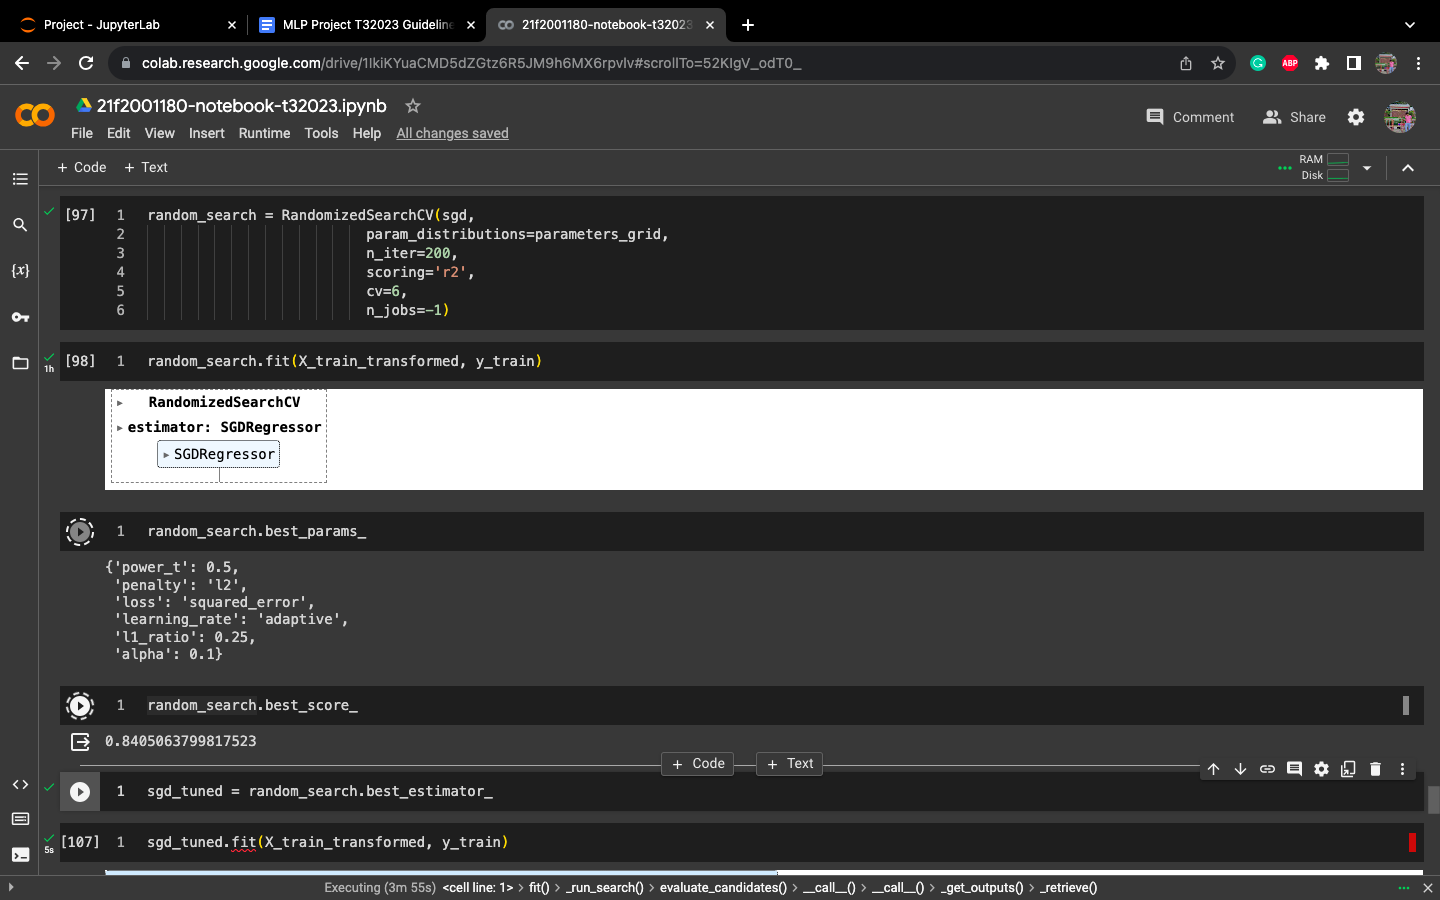

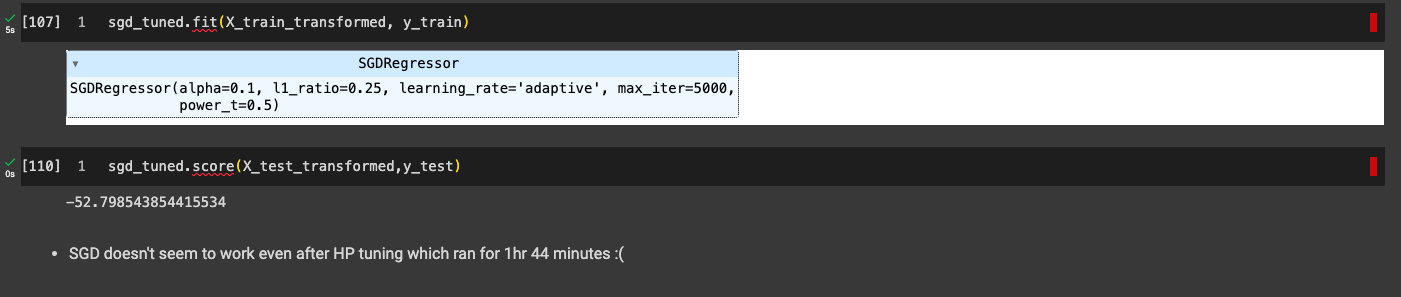

## Random Forest

In [508]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(max_depth=60, oob_score=True)


In [509]:
rforest.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=60, oob_score=True)

In [510]:
from sklearn.metrics import r2_score

In [511]:
r2_score(y_test, rforest.predict(X_test_transformed))

0.9245411447153002

In [512]:
import pickle as pk

# Saving the model with using pickle 
with open("rforest_92score.pkl", "wb") as file:
    pk.dump(rforest, file)

### Random Forest - HP Tuning

In [44]:
rforest = RandomForestRegressor(oob_score=True)

# Parameter distribution for RForest training
forest_params = {
    'n_estimators': [100, 300, 400],
    'max_depth': [50, 60, 70],
    'min_samples_split': [2,10, 20],
    'max_features': [1, 5, 'sqrt', 'log2']
}

In [46]:
random_search_rf = RandomizedSearchCV(rforest,
                      forest_params,
                      n_iter=100,
                      scoring='r2',
                      cv=4,
                      n_jobs=-1)

CPU times: user 2.92 ms, sys: 121 µs, total: 3.04 ms
Wall time: 3.35 ms


- Below is a HP tuning done on google colab. Result in the bellow attached screenshot


In [48]:
# random_search_rf.fit(X_train_transformed, y_train)

***
***
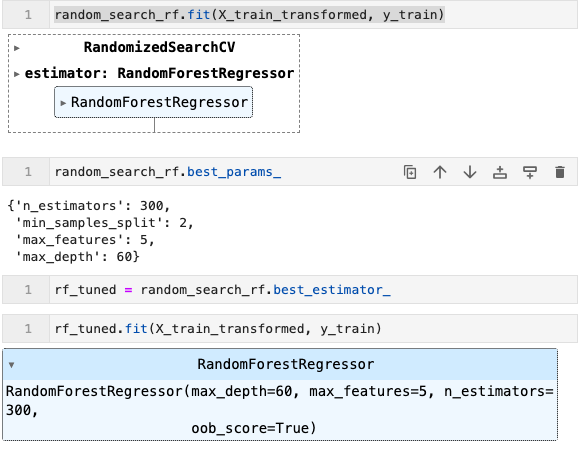
***
***

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
# Best HPs from the training:

rforest_tuned = RandomForestRegressor(max_depth=60,
                                      max_features=5, 
                                      n_estimators=300,
                                      oob_score=True)


In [553]:
%%time
rforest_tuned.fit(X_train_transformed, y_train)

CPU times: user 2min 1s, sys: 7.37 s, total: 2min 8s
Wall time: 2min 14s


In [554]:
print(f"Score on the TRAINING SET: {r2_score(y_train, rforest_tuned.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, rforest_tuned.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.991183536466352
Score on the TEST SET: 0.9260860735206305


In [525]:
# Saving the model with using pickle 
with open("rforest_tuned.pkl", "wb") as file:
    pk.dump(rforest_tuned, file)

## Gradient Boosting Model

In [516]:
from sklearn.ensemble import GradientBoostingRegressor

In [517]:
# Trying random hyper-parameters
gbr = GradientBoostingRegressor(n_estimators=300, alpha=0.6, max_depth=30)

In [518]:
gbr.fit(X_train_transformed, y_train)

GradientBoostingRegressor(alpha=0.6, max_depth=30, n_estimators=300)

In [555]:
print(f"Score on the TRAINING SET: {r2_score(y_train, gbr.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, gbr.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9999999999999999
Score on the TEST SET: 0.8967509225257723


In [562]:
print(f"Correlation between R_FOREST and lreg on train set: \n\n{np.corrcoef(rforest_tuned.predict(X_train_transformed), lreg.predict(X_train_transformed))}")
print(f"\n***\nCorrelation between R_FOREST and lreg on test set: \n\n{np.corrcoef(rforest_tuned.predict(X_test_transformed), lreg.predict(X_test_transformed))}")


Correlation between R_FOREST and lreg on train set: 

[[1.         0.90709768]
 [0.90709768 1.        ]]

***
Correlation between R_FOREST and lreg on test set: 

[[1.         0.92699432]
 [0.92699432 1.        ]]


## Stacking of Models
- Let's try stacking the results of L-Reg and R-Forest

In [567]:
lreg_r2 = r2_score(y_train, lreg.predict(X_train_transformed))
rforest_r2 = r2_score(y_train, rforest_tuned.predict(X_train_transformed))

sum_r2 = lreg_r2 + rforest_r2
normalized_weights = [lreg_r2/sum_r2, rforest_r2/sum_r2]

In [569]:
normalized_weights

[0.4432831310210922, 0.5567168689789078]

In [571]:
# Finding the test score by taking a weighted avg
y_pred_stacked = lreg.predict(X_test_transformed)*normalized_weights[0] + rforest_tuned.predict(X_test_transformed)*normalized_weights[1]

In [572]:
print(f"R2 Score on the weighted avg output: {r2_score(y_test, y_pred_stacked)}")

R2 Score on the weighted avg output: 0.8914625133207107


## XGBRegressor

In [526]:
from xgboost import XGBRegressor


In [530]:
xgb = XGBRegressor()

In [557]:
xgb.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [558]:
print(f"Score on the TRAINING SET: {r2_score(y_train, xgb.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, xgb.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9731030247683933
Score on the TEST SET: 0.9176480659949766


In [535]:
submission_generator(xgb, "xgboost")

Submission file generated for: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Name of the file: submission_xgboost.csv


In [537]:
xgb = XGBRegressor(n_estimators=250, max_depth=65)

In [538]:
%%time
xgb.fit(X_train_transformed, y_train)

CPU times: user 4min 26s, sys: 16.5 s, total: 4min 43s
Wall time: 1min 23s


In [564]:
print(f"Score on the TRAINING SET: {r2_score(y_train, xgb.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, xgb.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9731030247683933
Score on the TEST SET: 0.9176480659949766


## HP Tuning - XGBRegressor

In [541]:
xgb = XGBRegressor()

parameters = {
    'n_estimators': [100,200,300,400],
    'max_depth': [40,50,70,80,100,120]
}

In [593]:
random_search_xgb = RandomizedSearchCV(estimator = xgb, 
                                       param_distributions = parameters, 
                                       n_iter=15,
                                       cv = 3, 
                                       scoring = 'r2')

In [594]:
# random_search_xgb.fit(X_train_transformed, y_train)

In [584]:
random_search_xgb.best_params_

{'n_estimators': 200, 'max_depth': 80}

In [585]:
xgb_tuned = random_search_xgb.best_estimator_

In [586]:
xgb_tuned.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=80, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [589]:
print(f"R2 score on train set: {r2_score(y_train, xgb.predict(X_train_transformed))}")
print(f"R2 score on test set: {r2_score(y_test, xgb.predict(X_test_transformed))}")

R2 score on train set: 0.9731030247683933
R2 score on test set: 0.9176480659949766


In [591]:
submission_generator(xgb_tuned, "xgb_tuned")

Submission file generated for: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=80, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Name of the file: submission_xgb_tuned.csv


# Submission 

def submission_generator(model, name='default'):
    # ---------------------
    # Loading the test file
    # ---------------------
    import numpy as np 
    import pandas as pd 
    import os

    # For kaggle:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            os.path.join(dirname, filename)
    try:
        X_test = pd.read_csv(os.path.join(dirname, "test.csv")) # Either in the kaggle directory
        X_test.index = X_test.index + 1
    except NameError:
        X_test = pd.read_csv("test.csv") # or in the current directory
        X_test.index = X_test.index + 1
    
    # ---------------------
    # Pre-processing the test data
    # ---------------------
    
    X_test.drop(['tolls_amount', 'Airport_fee'], axis=1, inplace=True)

    # replaceing the 99 value with the mode of the attribute
    column_name = 'RatecodeID'
    # Replace 99 with the most frequent value
    most_frequent_value = X_test[column_name].mode()[0]
    X_test[column_name] = X_test[column_name].replace(99, most_frequent_value) 
    X_test[column_name] = X_test[column_name].replace(np.nan, most_frequent_value) # Doing the same for nan

    column_name = 'payment_type'
    X_test[column_name] = X_test[column_name].replace('cred', 'Credit Card')

    
    # ---------------------
    # Predicting with the model the test data
    # ---------------------
    y_test = model.predict(X_test_transformed)
    y_test = pd.DataFrame(y_test, columns=['total_amount'])
    # y_test_mean = y_test['total_amount'].mean()
    # y_test.reindex(deleted_indices, fill_value=y_test_mean)
    y_test.insert(0, 'ID', value=(y_test.index+1))
    
    # y_test.insert(0, 'ID', value=(index_test))
    y_test.to_csv(f'submission_{name}.csv', index=False)
    
    # return deleted_indices
    return print(f"Submission file generated for: {model}\nName of the file: submission_{name}.csv")


    


In [579]:
submission_generator(rforest_tuned, "rforest_tuned")

Submission file generated for: RandomForestRegressor(max_depth=60, max_features=5, n_estimators=300,
                      oob_score=True)
Name of the file: submission_rforest_tuned.csv


In [284]:
df_sub = pd.read_csv("submission_lreg.csv", index_col=0)

In [277]:
df_sub

total_amount
ID                 
1         13.799484
2         20.551292
3         23.876523
4         31.911976
5          0.422807
...             ...
49996     18.688708
49997     -9.425377
49998     19.817739
49999     37.316087
50000     31.290641

[50000 rows x 1 columns]

# Fine-tuning the models

- The maximum r2_score that we got was 92.4% (on submission)
- Let's fine-tune our model more, starting with feature selection

## Feature Selection

In [596]:
from sklearn.feature_selection import RFE

In [598]:
rfe = RFE(rforest_tuned, n_features_to_select=0.90, verbose=2)

In [599]:
rfe.fit(X_train_transformed, y_train)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.


RFE(estimator=RandomForestRegressor(max_depth=60, max_features=5,
                                    n_estimators=300, oob_score=True),
    n_features_to_select=0.9, verbose=2)

In [602]:
print(f"Score on the TRAINING SET: {r2_score(y_train, rfe.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, rfe.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9912892577719735
Score on the TEST SET: 0.9271211656520221


- Still overfitting upto some extent

In [605]:
from sklearn.preprocessing import (PolynomialFeatures, PowerTransformer)

In [606]:
power_trans = PowerTransformer()

In [608]:
power_trans.fit(X_train_transformed, y_train)

PowerTransformer()

In [610]:
X_train_transformed_pt = power_trans.transform(X_train_transformed)

In [611]:
rforest_tuned.fit(X_train_transformed_pt, y_train)

RandomForestRegressor(max_depth=60, max_features=5, n_estimators=300,
                      oob_score=True)

In [612]:
X_test_transformed_pt = power_trans.transform(X_test_transformed)

In [614]:
print(f"Score on the TRAINING SET: {r2_score(y_train, rforest_tuned.predict(X_train_transformed_pt))}")
print(f"Score on the TEST SET: {r2_score(y_test, rforest_tuned.predict(X_test_transformed_pt))}")

Score on the TRAINING SET: 0.987862690748873
Score on the TEST SET: 0.9062230390505851


In [620]:
# SUBMISSION TEST
def submission_dummy(model, name):
    # For kaggle:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            os.path.join(dirname, filename)
    try:
        X_test = pd.read_csv(os.path.join(dirname, "test.csv")) # Either in the kaggle directory
        X_test.index = X_test.index + 1
    except NameError:
        X_test = pd.read_csv("test.csv") # or in the current directory
        X_test.index = X_test.index + 1

    # ---------------------
    # Pre-processing the test data
    # ---------------------

    X_test.drop(['tolls_amount', 'Airport_fee'], axis=1, inplace=True)

    # replaceing the 99 value with the mode of the attribute
    column_name = 'RatecodeID'
    # Replace 99 with the most frequent value
    most_frequent_value = X_test[column_name].mode()[0]
    X_test[column_name] = X_test[column_name].replace(99, most_frequent_value) 
    X_test[column_name] = X_test[column_name].replace(np.nan, most_frequent_value) # Doing the same for nan

    column_name = 'payment_type'
    X_test[column_name] = X_test[column_name].replace('cred', 'Credit Card')

    X_test_transformed = final_pipe.transform(X_test)
    X_test_transformed_pt = power_trans.transform(X_test_transformed)
    # ---------------------
    # Predicting with the model the test data
    # ---------------------
    y_test = model.predict(X_test_transformed_pt)
    y_test = pd.DataFrame(y_test, columns=['total_amount'])
    # y_test_mean = y_test['total_amount'].mean()
    # y_test.reindex(deleted_indices, fill_value=y_test_mean)
    y_test.insert(0, 'ID', value=(y_test.index+1))

    # y_test.insert(0, 'ID', value=(index_test))
    y_test.to_csv(f'submission_{name}.csv', index=False)

    # return deleted_indices
    return print(f"Submission file generated for: {model}\nName of the file: submission_{name}.csv")


In [623]:
submission_dummy(rforest_tuned, "power_transformer")

Submission file generated for: RandomForestRegressor(max_depth=60, max_features=5, n_estimators=300,
                      oob_score=True)
Name of the file: submission_power_transformer.csv


- 89.9% score :(

# Bagging Regressor

In [44]:
from sklearn.ensemble import BaggingRegressor

In [675]:
bagging = BaggingRegressor(n_estimators=35, oob_score=True, verbose=2,bootstrap_features=True, max_samples=0.6)

In [676]:
bagging.fit(X_train_transformed, y_train)

Building estimator 1 of 35 for this parallel run (total 35)...
Building estimator 2 of 35 for this parallel run (total 35)...
Building estimator 3 of 35 for this parallel run (total 35)...
Building estimator 4 of 35 for this parallel run (total 35)...
Building estimator 5 of 35 for this parallel run (total 35)...
Building estimator 6 of 35 for this parallel run (total 35)...
Building estimator 7 of 35 for this parallel run (total 35)...
Building estimator 8 of 35 for this parallel run (total 35)...
Building estimator 9 of 35 for this parallel run (total 35)...
Building estimator 10 of 35 for this parallel run (total 35)...
Building estimator 11 of 35 for this parallel run (total 35)...
Building estimator 12 of 35 for this parallel run (total 35)...
Building estimator 13 of 35 for this parallel run (total 35)...
Building estimator 14 of 35 for this parallel run (total 35)...
Building estimator 15 of 35 for this parallel run (total 35)...
Building estimator 16 of 35 for this parallel run

BaggingRegressor(bootstrap_features=True, max_samples=0.6, n_estimators=35,
                 oob_score=True, verbose=2)

In [677]:
print(f"Score on the TRAINING SET: {r2_score(y_train, bagging.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, bagging.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9718991511452382
Score on the TEST SET: 0.9059739600114519


## HP Tuning

In [46]:
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)

In [56]:
bagging = BaggingRegressor(oob_score=True, verbose=1)
parameters = {
    'n_estimators':[35, 50, 100, 150], 
    'bootstrap_features':[True, False], 
    'max_samples':[0.3, 0.6, 0.7, 0.8, 1]
}

random_search_bagging = RandomizedSearchCV(bagging,
                                           param_distributions=parameters,
                                           n_iter=10,
                                           cv=2,
                                           scoring='r2', 
                                           refit=False,        
                                           verbose=3
                                          )

In [58]:
# random_search_bagging.fit(X_train_transformed, y_train)

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly = PolynomialFeatures(degree=2)

In [61]:
X_train_poly = poly.fit_transform(X_train_transformed)
X_test_poly = poly.transform(X_test_transformed)

In [68]:
X_train_poly.shape

(131250, 351)

In [69]:
rforest_tuned.fit(X_train_poly, y_train)

RandomForestRegressor(max_depth=60, max_features=5, n_estimators=300,
                      oob_score=True)

In [73]:
print(f"Score on the TRAINING SET: {r2_score(y_train, rforest_tuned.predict(X_train_poly))}")
print(f"Score on the TEST SET: {r2_score(y_test, rforest_tuned.predict(X_test_poly))}")

Score on the TRAINING SET: 0.9913337492393025
Score on the TEST SET: 0.9273849879905038


# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dtree = DecisionTreeRegressor(max_depth=45,criterion="friedman_mse")

In [82]:
dtree.fit(X_train_transformed, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=45)

In [83]:
print(f"Score on the TRAINING SET: {r2_score(y_train, dtree.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, dtree.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9999982116928303
Score on the TEST SET: 0.8828745514715316


# Multi Layered Perceptron

In [84]:
from sklearn.neural_network import MLPRegressor

In [85]:
mlp = MLPRegressor()

In [86]:
mlp.fit(X_train_transformed, y_train)

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [87]:
print(f"Score on the TRAINING SET: {r2_score(y_train, mlp.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, mlp.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9381929207352427
Score on the TEST SET: 0.9181928055538203


- Not overfitting much, let's tune MLP

In [89]:
MLPRegressor()

parameters = {
    "hidden_layer_sizes": [(100,), (150,), (200,)],
    "activation": ['tanh', 'relu'],
    "learning_rate": ['constant', "adaptive"],
    "max_iter": [500, 1000, 1500],
    "learning_rate_init": [0.01, 0.001],
    "alpha": [0.0001, 0.001]
}

In [98]:
random_search_mlp = RandomizedSearchCV(mlp,
                                       param_distributions = parameters,
                                       n_iter=10,
                                       cv=2,
                                       scoring='r2',
                                       verbose=3
                                      )

In [99]:
random_search_mlp.fit(X_train_transformed, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=500;, score=0.912 total time= 4.0min
[CV 2/2] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=500;, score=0.932 total time= 3.6min
[CV 1/2] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, learning_rate_init=0.001, max_iter=500;, score=-9774.290 total time= 2.0min
[CV 2/2] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, learning_rate_init=0.001, max_iter=500;, score=0.927 total time= 2.6min
[CV 1/2] END activation=relu, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, learning_rate_init=0.01, max_iter=500;, score=-8851.063 total time=  17.2s
[CV 2/2] END activation=relu, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, learning_rate_init=0.01, max_iter=500;, score=0.919 total time=  

RandomizedSearchCV(cv=2, estimator=MLPRegressor(),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.001],
                                        'hidden_layer_sizes': [(100,), (150,),
                                                               (200,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.01, 0.001],
                                        'max_iter': [500, 1000, 1500]},
                   scoring='r2', verbose=3)

In [100]:
random_search_mlp.best_score_

0.9218668549279866

In [101]:
random_search_mlp.best_params_

{'max_iter': 500,
 'learning_rate_init': 0.001,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100,),
 'alpha': 0.0001,
 'activation': 'tanh'}

In [102]:
mlp_tuned = random_search_mlp.best_estimator_

In [111]:
from sklearn.neural_network import MLPRegressor
mlp_tuned = MLPRegressor(max_iter=500,
                         learning_rate_init = 0.001,
                         learning_rate = 'constant',
                         hidden_layer_sizes = (100,),
                         alpha = 0.0001,
                         activation = 'tanh'
                        )

In [138]:
mlp_tuned.fit(X_train_transformed, y_train)

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', max_iter=500)

In [ ]:
print(f"Score on the TRAINING SET: {r2_score(y_train, mlp.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, mlp.predict(X_test_transformed))}")

In [139]:
print(f"Score on the TRAINING SET: {r2_score(y_train, mlp_tuned.predict(X_train_transformed))}")
print(f"Score on the TEST SET: {r2_score(y_test, mlp_tuned.predict(X_test_transformed))}")

Score on the TRAINING SET: 0.9491168153578945
Score on the TEST SET: 0.9320546086289312


In [105]:
submission_generator(mlp_tuned, "mlp")

Submission file generated for: MLPRegressor(activation='tanh', max_iter=500)
Name of the file: submission_mlp.csv


# Insights from the models

#### Linear regression score:
Score on the TRAINING SET: 0.7892251267098033
Score on the TEST SET: 0.7784359937911887

- There's a very minor overfittin. Otherwise the model performs really well on the test dataset as well


#### Tuned RForest score:
Score on the TRAINING SET: 0.991183536466352
Score on the TEST SET: 0.9260860735206305

- Here, we observe some more overfitting but random forest clearly does better than the baseline model


#### Gradient Boosting score:
Score on the TRAINING SET: 0.9999999999999999
Score on the TEST SET: 0.8967509225257723

- G.B. regressor was able to overfit the entire training set
- Did worse than Rforest but better than the baseline model


#### XGB-Regressor score:
Score on the TRAINING SET: 0.9731030247683933
Score on the TEST SET: 0.9176480659949766

- Overfitting is observed. Test score is still not better than the Rforest. Even the submission score is lower than Rforest
- Does better than most, but not Rforest

#### Bagging score:
Score on the TRAINING SET: 0.9718991511452382
Score on the TEST SET: 0.9059739600114519

- Overfitting
- does better than baseline and gradient boosting


#### DTree score;
Score on the TRAINING SET: 0.9999982116928303
Score on the TEST SET: 0.8828745514715316

- Highly overfitting the train data
- performs really poor on the test dataset

#### MLP score:
Score on the TRAINING SET: 0.9381929207352427
Score on the TEST SET: 0.9181928055538203

- Not much overfitting

#### Tuned MLP score:
Score on the TRAINING SET: 0.9457369182336401
Score on the TEST SET: 0.9316791725685332

- Does better on the testing set but not on the submission

# other Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1002, test_size=0.25)

In [ ]:
# Custom transformer which does the following:
# Converts date time attributes tothe respective format
# Finds the difference and then removes the original columns
class DateTimeCustomTrans(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    # Fit function defined
    def fit(self, X, y=None):
        return self
    
    # Transformer code logic
    def transform(self, X, y=None):
        X_trans = pd.DataFrame(X.copy())
        

        # Date time attributes
        self.attribs = ['tpep_pickup_datetime', 
               'tpep_dropoff_datetime']

        # Converting to datetime
        for attrib in self.attribs:
            X_trans[attrib] = pd.to_datetime(X_trans[attrib])

        # Time difference
        time_diff = (X_trans[self.attribs[1]] - X_trans[self.attribs[0]])
        
        # depricated col name: X.shape[1]
        X_trans['time_difference_min'] = time_diff.apply(lambda x: x.seconds//60)
        X_trans.drop(self.attribs[0], axis=1, inplace=True)
        X_trans.drop(self.attribs[1], axis=1, inplace=True)
        
        
        
        return X_trans
        
        

In [ ]:
# Creating a column transformer for all the data cleaning
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# numerical attributes: They will be used for imputing
# This doesn't include any of the ID attributes (They will be dealt with later on)
num_attribs = ['passenger_count', 'trip_distance', 
                        'extra', 'tip_amount', 
                        'improvement_surcharge', 
                        'congestion_surcharge', 'time_difference_min']


# Categorical attributes: For categorical encoding
cat_attribs = ['store_and_fwd_flag',
               'payment_type']

# Date time attributes
time_attribs = ['tpep_pickup_datetime', 
               'tpep_dropoff_datetime']

# All other remaining attributes
other_attribs = X.columns.difference(num_attribs+cat_attribs+time_attribs)


# Imputes the numerical and categorical attributes
# Also identify the outliers in each numerical attribute
impute_col_trans = ColumnTransformer([
    ('num_impute', SimpleImputer(strategy='median'), num_attribs),
    ('cat_impute', SimpleImputer(strategy='most_frequent'), cat_attribs),
    ('outlier_identify', OutliersIdentifier(), num_attribs), # Identifying and marking the outliers
], remainder='passthrough')




# The output after the first set of imputation is an array
# We need to specify integer columns now, instead of string names
# These columns indices were defined after executing the above imputations
# Now, mostly, we have standardization of attributes
# So, numerical and others attributes will be counted as the same
# Other attributes were mostly ID columns
num_attribs = [0,1,2,3,4,5,6,9,10,11,12,13,14]
cat_attribs = [7, 8]
# time_attribs = [9,10]


# standardizing the attributes and OHE
pipe_test = Pipeline([
    ('datetime_featureEngineering', DateTimeCustomTrans()), # time difference using custom transf
    ('impute', impute_col_trans),
    ('col', ColumnTransformer([
        ('cat_ohe', OneHotEncoder(), cat_attribs), # One hot encoding on categorical attributes
        ('num_scale', StandardScaler(), num_attribs), # standard scaler on numerical attributes
        ], remainder='passthrough')
    ),
    ('impute2', SimpleImputer(strategy='median')),
    ('outlier_impute', SimpleImputer(strategy='mean', missing_values=-93545)),
])


# Imputing the outliers
final_col_trans = ColumnTransformer([
    ('outlier_impute', SimpleImputer(strategy='mean', 
                                     missing_values=-93545), 
     num_attribs), # Imputing outliers
], remainder='passthrough')


# Full pipeline - yet incomplete
full_pipe = Pipeline([
    ('impute_CT', impute_col_trans),
    ('impute_others_CT',SimpleImputer(strategy='most_frequent')), # One attribute from others need to be imputed (its a type of ID)
    ('intermediate_CT', intermediate_col_trans),
    ('date_time', DateTimeCustomTrans()),
    # ('final_CT', final_col_trans)
])


# Final pipeline to be used
final_pipe = Pipeline([
    ('full_pipe', full_pipe),
    ('final_standardize', ColumnTransformer([ # This step is to scale the last column which was added "time difference in minutes"
        ('final_scaler', StandardScaler(), [-1])
    ], remainder='passthrough'))
])


In [ ]:
column_name = 'RatecodeID'

# Replace 99 with the most frequent value
most_frequent_value = X_train[column_name].mode()[0]
X_train[column_name] = X_train[column_name].replace(99, most_frequent_value)

column_name = 'payment_type'
X_train[column_name] = X_train[column_name].replace('cred', 'Credit Card')


In [405]:
pipe_test

Pipeline(steps=[('datetime_featureEngineering', DateTimeCustomTrans()),
                ('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['passenger_count',
                                                   'trip_distance', 'extra',
                                                   'tip_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'time_difference_min']),
                                                 ('cat_impute',
                                                  SimpleImputer(strategy='mo...
                                                   'tip_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'time_difference_min'])])),
                ('col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ohe', OneHotEncoder(),
                                                  [7, 8]),
                                                 ('num_scale', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 9, 10,
                                                   11, 12, 13, 14])])),
                ('impute2', SimpleImputer(strategy='median')),
                ('outlier_impute', SimpleImputer(missing_values=-93545))])

In [408]:
X_train_transformed = pipe_test.fit_transform(X_train, y_train)

In [409]:
temp[-1]

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00, -3.93110158e-01,
       -8.52114171e-03, -9.90900071e-01, -2.64353245e-01,  1.02963946e-01,
        3.03968080e-01, -6.78053886e-01, -1.66012337e+00,  4.00640001e-01,
        1.61173365e-01,  2.61322140e-01,  1.04283702e-01, -2.64568220e+00,
        1.12000000e+02,  1.00000000e+00,  1.00000000e+00,  2.18000000e+02,
        2.02000000e+02,  0.00000000e+00,  0.00000000e+00])

## X_test

In [411]:
column_name = 'RatecodeID'

# Replace 99 with the most frequent value
most_frequent_value = X_test[column_name].mode()[0]
X_test[column_name] = X_test[column_name].replace(99, most_frequent_value)

column_name = 'payment_type'
X_test[column_name] = X_test[column_name].replace('cred', 'Credit Card')


In [413]:
X_test_transformed = pipe_test.transform(X_test)

In [414]:
X_train_transformed.shape

(131250, 27)

In [415]:
X_test_transformed.shape

(43750, 27)

In [417]:
rforest_tuned.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=60, max_features=5, n_estimators=300,
                      oob_score=True)

In [418]:
r2_score(y_test, rforest_tuned.predict(X_test_transformed))

0.9308684515812278

In [420]:
def submission_generator(model, name='default'):
    # ---------------------
    # Loading the test file
    # ---------------------
    import numpy as np 
    import pandas as pd 
    import os

    # For kaggle:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            os.path.join(dirname, filename)
    try:
        X_test = pd.read_csv(os.path.join(dirname, "test.csv")) # Either in the kaggle directory
        X_test.index = X_test.index + 1
    except NameError:
        X_test = pd.read_csv("test.csv") # or in the current directory
        X_test.index = X_test.index + 1
    
    # ---------------------
    # Pre-processing the test data
    # ---------------------
    # X_test.drop(['tolls_amount', 'Airport_fee'], axis=1, inplace=True)
    
    column_name = 'RatecodeID'
    # Replace 99 with the most frequent value
    most_frequent_value = X_test[column_name].mode()[0]
    X_test[column_name] = X_test[column_name].replace(99, most_frequent_value)

    column_name = 'payment_type'
    X_test[column_name] = X_test[column_name].replace('cred', 'Credit Card')

    
    # Storing the index for future reference
    index_test = X_test.index
    
    X_test_transformed = pipe_test.transform(X_test)
    
    # ---------------------
    # Predicting with the model the test data
    # ---------------------
    y_test = model.predict(X_test_transformed)
    y_test = pd.DataFrame(y_test, columns=['total_amount'])
    # y_test_mean = y_test['total_amount'].mean()
    # y_test.reindex(deleted_indices, fill_value=y_test_mean)
    y_test.insert(0, 'ID', value=(y_test.index+1))
    
    
    # y_test.insert(0, 'ID', value=(index_test))
    y_test.to_csv(f'submission_{name}.csv', index=False)
    
    # return deleted_indices
    return print(f"Submission file generated for: {model}\nName of the file: submission_{name}.csv")


    


In [421]:
submission_generator(rforest_tuned, "rforest_tuned_v2")

Submission file generated for: RandomForestRegressor(max_depth=60, max_features=5, n_estimators=300,
                      oob_score=True)
Name of the file: submission_rforest_tuned_v2.csv


In [422]:
pd.read_csv("submission_rforest_tuned_v2.csv")

ID  total_amount
0          1     35.029267
1          2     25.608667
2          3     15.637667
3          4     14.681867
4          5     24.631833
...      ...           ...
49995  49996     15.331233
49996  49997     28.851800
49997  49998     20.760833
49998  49999     37.078200
49999  50000     17.691200

[50000 rows x 2 columns]